# Using Data Augmentation as Practice for Predicting Genetic Markers onto Individual Species of  Blister Beetle: Gnathium minimum

Data Source:
- URL: https://datadryad.org/stash/dataset/doi:10.5061/dryad.2tg68

Publication Citation:
- Author(s): Marschalek, D.A., Berres M.E. 
- Title:"Genetic population structure of the blister beetle, Gnathium minimum: core and peripheral populations"
- Publication Date: Epub 2014 Aug 26.
- Source: Journal of Heredity. 105:784-792
- URL: https://academic.oup.com/jhered/article/105/6/878/2961821?login=true


In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
import networkx as nx
import matplotlib.pyplot as plt

# Preprocess

In [2]:
import pandas as pd

# Load the data from the specified URL.
# Data Source: https://datadryad.org/stash/dataset/doi:10.5061/dryad.2tg68
url = "https://datadryad.org/stash/dataset/doi:10.5061/dryad.2tg68"
# Source: Marschalek, D.A., Berres M.E., Journal of Heredity, 2014
# Publication URL: https://academic.oup.com/jhered/article/105/6/878/2961821?login=true

# Load the CSV file into a DataFrame.
csv_path = r"C:\Users\Dave\Desktop\excel prep\BlisterBeetleGenetics_ForDave.csv"
df = pd.read_csv(csv_path)

# Replace spaces in column names with underscores.
df.columns = df.columns.str.replace(' ', '_')

# Drop rows with missing values.
df.dropna(inplace=True)

# Set a multi-level index for the DataFrame using 'State' and 'Location' columns.
df.set_index(['State', 'Location'], inplace=True)

# Display the first few rows of the preprocessed DataFrame.
print(df.head())


                Individual  Marker_1  Marker_2  Marker_3  Marker_4  Marker_5  \
State Location                                                                 
KS    KS_Meade1      GN001       0.0       0.0       1.0       1.0       1.0   
      KS_Meade1      GN004       0.0       0.0       1.0       1.0       1.0   
      KS_Meade1      GN005       0.0       0.0       1.0       1.0       1.0   
      KS_Meade1      GN006       0.0       0.0       1.0       1.0       1.0   
      KS_Meade1      GN007       1.0       0.0       0.0       1.0       1.0   

                 Marker_6  Marker_7  Marker_8  Marker_9  ...  Marker_142  \
State Location                                           ...               
KS    KS_Meade1       0.0       1.0       1.0       1.0  ...         0.0   
      KS_Meade1       0.0       0.0       1.0       1.0  ...         0.0   
      KS_Meade1       0.0       1.0       1.0       0.0  ...         0.0   
      KS_Meade1       0.0       0.0       1.0       0.0  ..

# EDA

**Summary Statistics**

In [3]:
# Exploratory Data Analysis (EDA)
## Summary Statistics

# Calculate summary statistics for numerical variables
summary_stats = df.describe()

# Print formatted summary statistics
print("Summary Statistics for Numerical Variables:\n")
print(summary_stats)

# Calculate summary statistics for categorical variables (e.g., counts and unique values)
categorical_stats = df.describe(include='object')

# Print formatted summary statistics for categorical variables
print("\nSummary Statistics for Categorical Variables:\n")
print(categorical_stats)


Summary Statistics for Numerical Variables:

         Marker_1    Marker_2    Marker_3    Marker_4    Marker_5    Marker_6  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.082305    0.074074    0.967078    0.991770    0.991770    0.444444   
std      0.275395    0.262432    0.178800    0.090534    0.090534    0.497930   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    1.000000    0.000000   
50%      0.000000    0.000000    1.000000    1.000000    1.000000    0.000000   
75%      0.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Marker_7    Marker_8    Marker_9   Marker_10  ...  Marker_142  \
count  243.000000  243.000000  243.000000  243.000000  ...  243.000000   
mean     0.514403    0.962963    0.374486    0.016461  ...    0.004115   
std

**Categorical Variables**

In [4]:
print(categorical_stats)


       Individual
count         243
unique        243
top         GN001
freq            1


**Data Visualization**


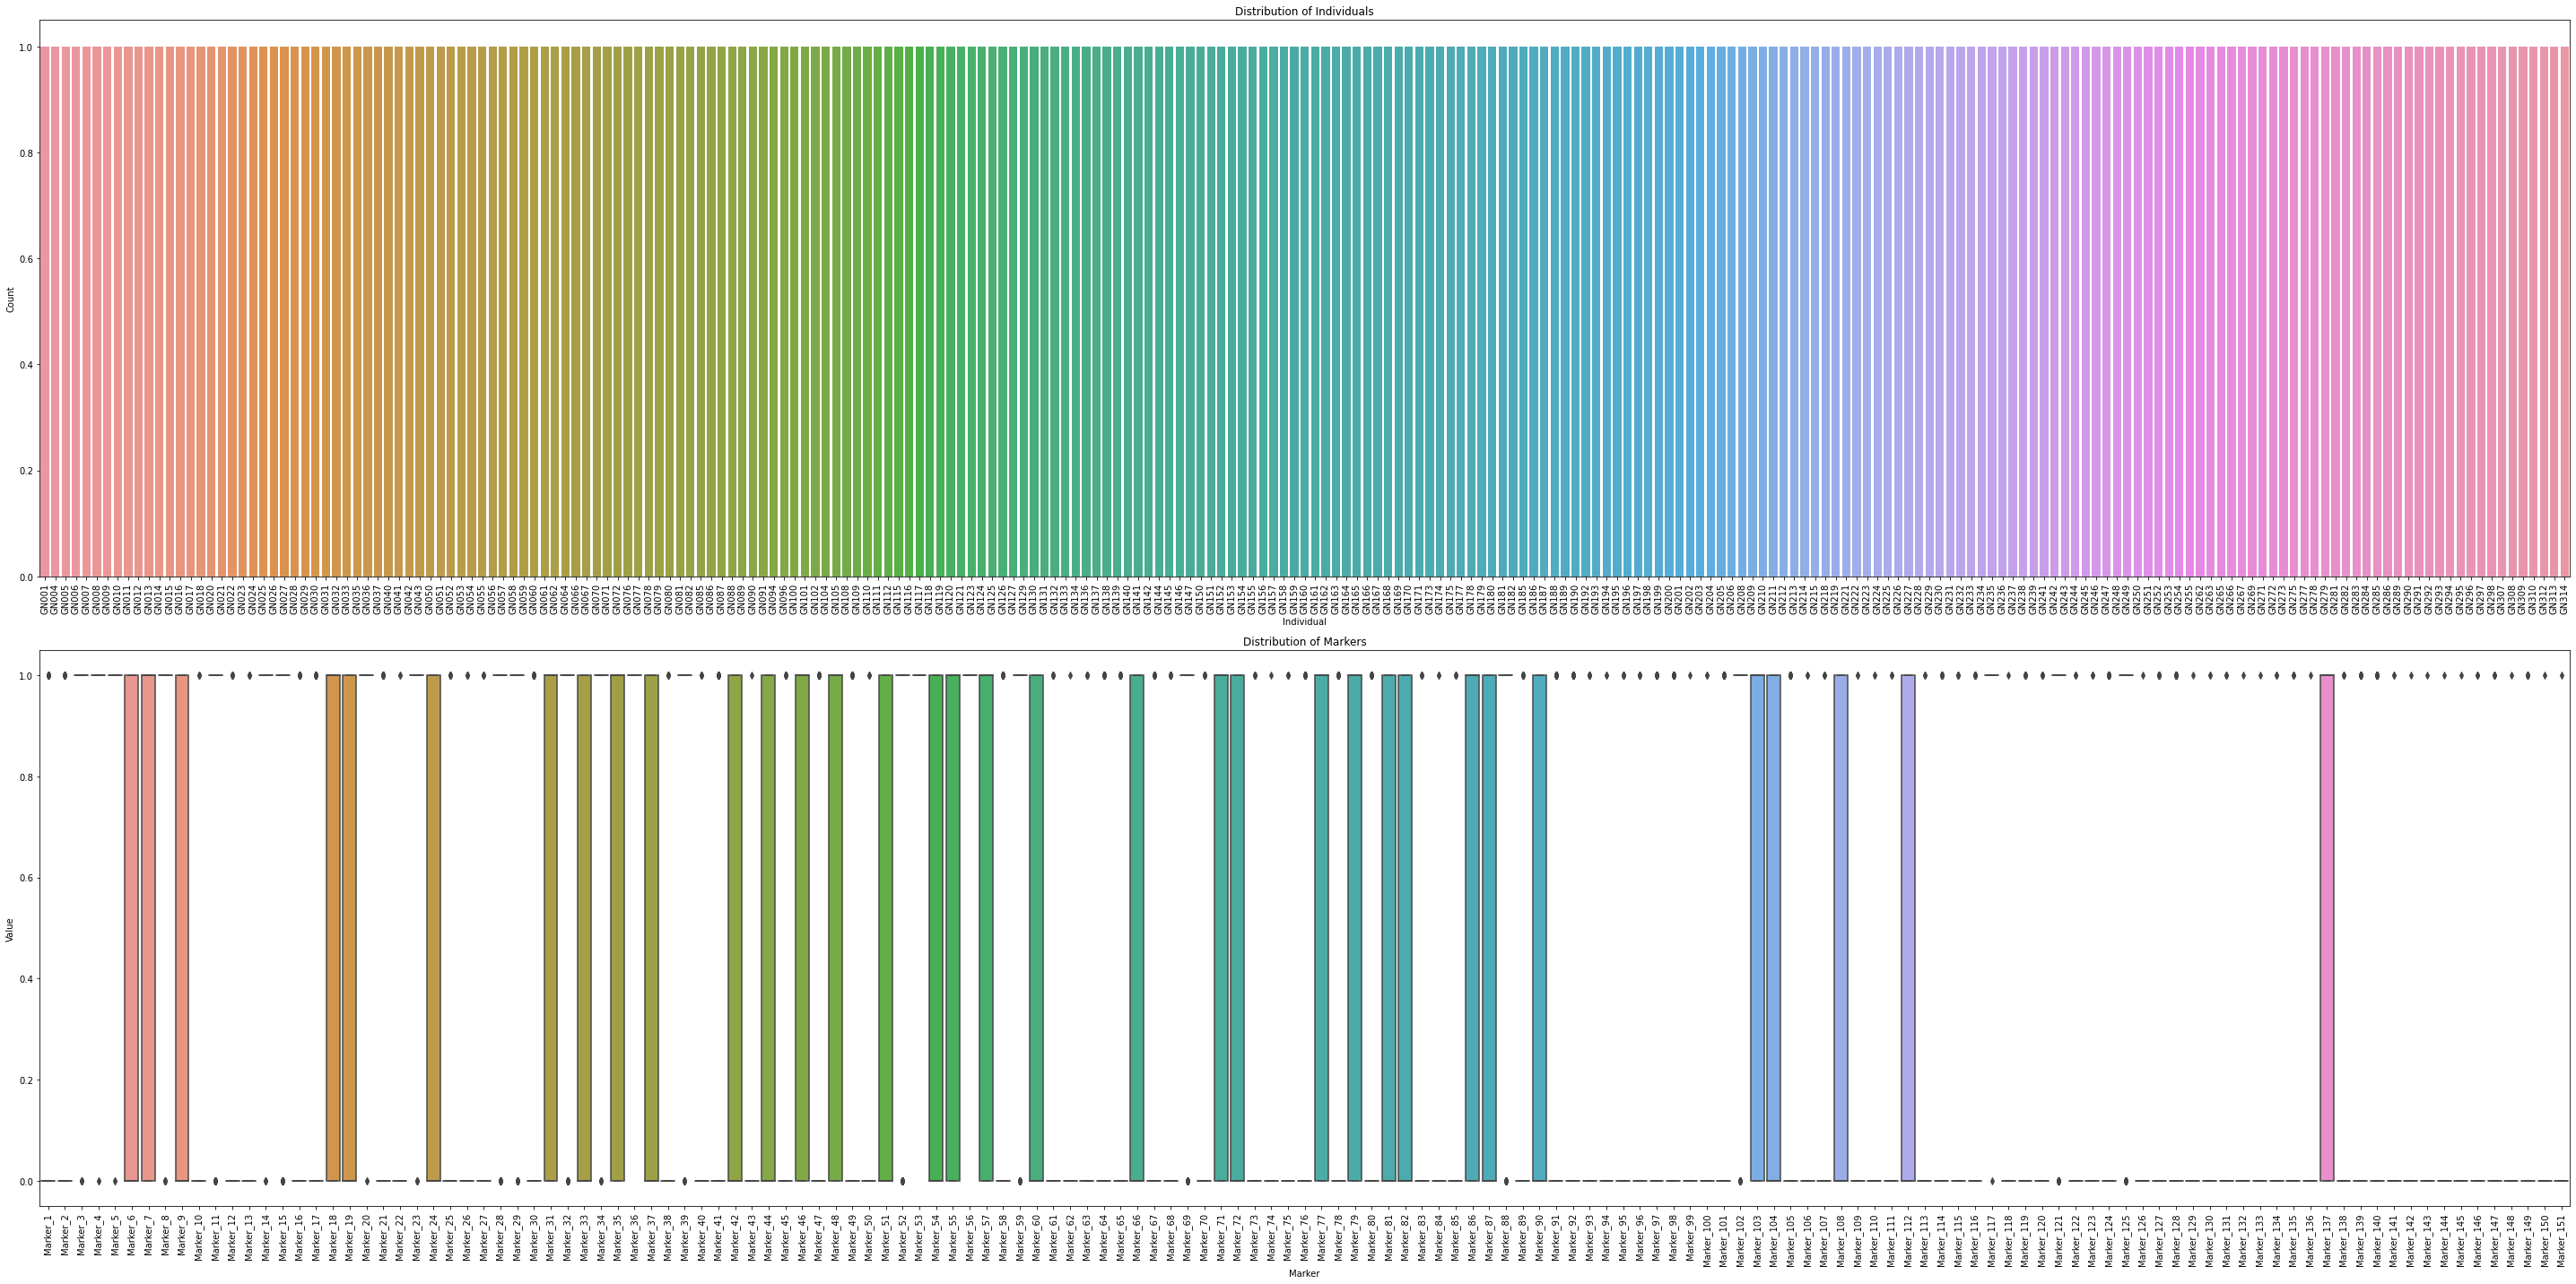

In [5]:
# Set a larger figure size
plt.figure(figsize=(40, 20))

# Visualize the distribution of the target variable ('Individual')
plt.subplot(2, 1, 1)
sns.countplot(x='Individual', data=df)
plt.title('Distribution of Individuals')
plt.xlabel('Individual')
plt.ylabel('Count')
plt.xticks(rotation=90)



# Visualize the distribution of the markers
# You can choose specific markers to visualize if there are too many
selected_markers = df.columns[1:]  # Exclude the 'Individual' column
plt.subplot(2, 1, 2)
sns.boxplot(data=df[selected_markers])
plt.title('Distribution of Markers')
plt.xlabel('Marker')
plt.ylabel('Value')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Visualize in Subsets** 

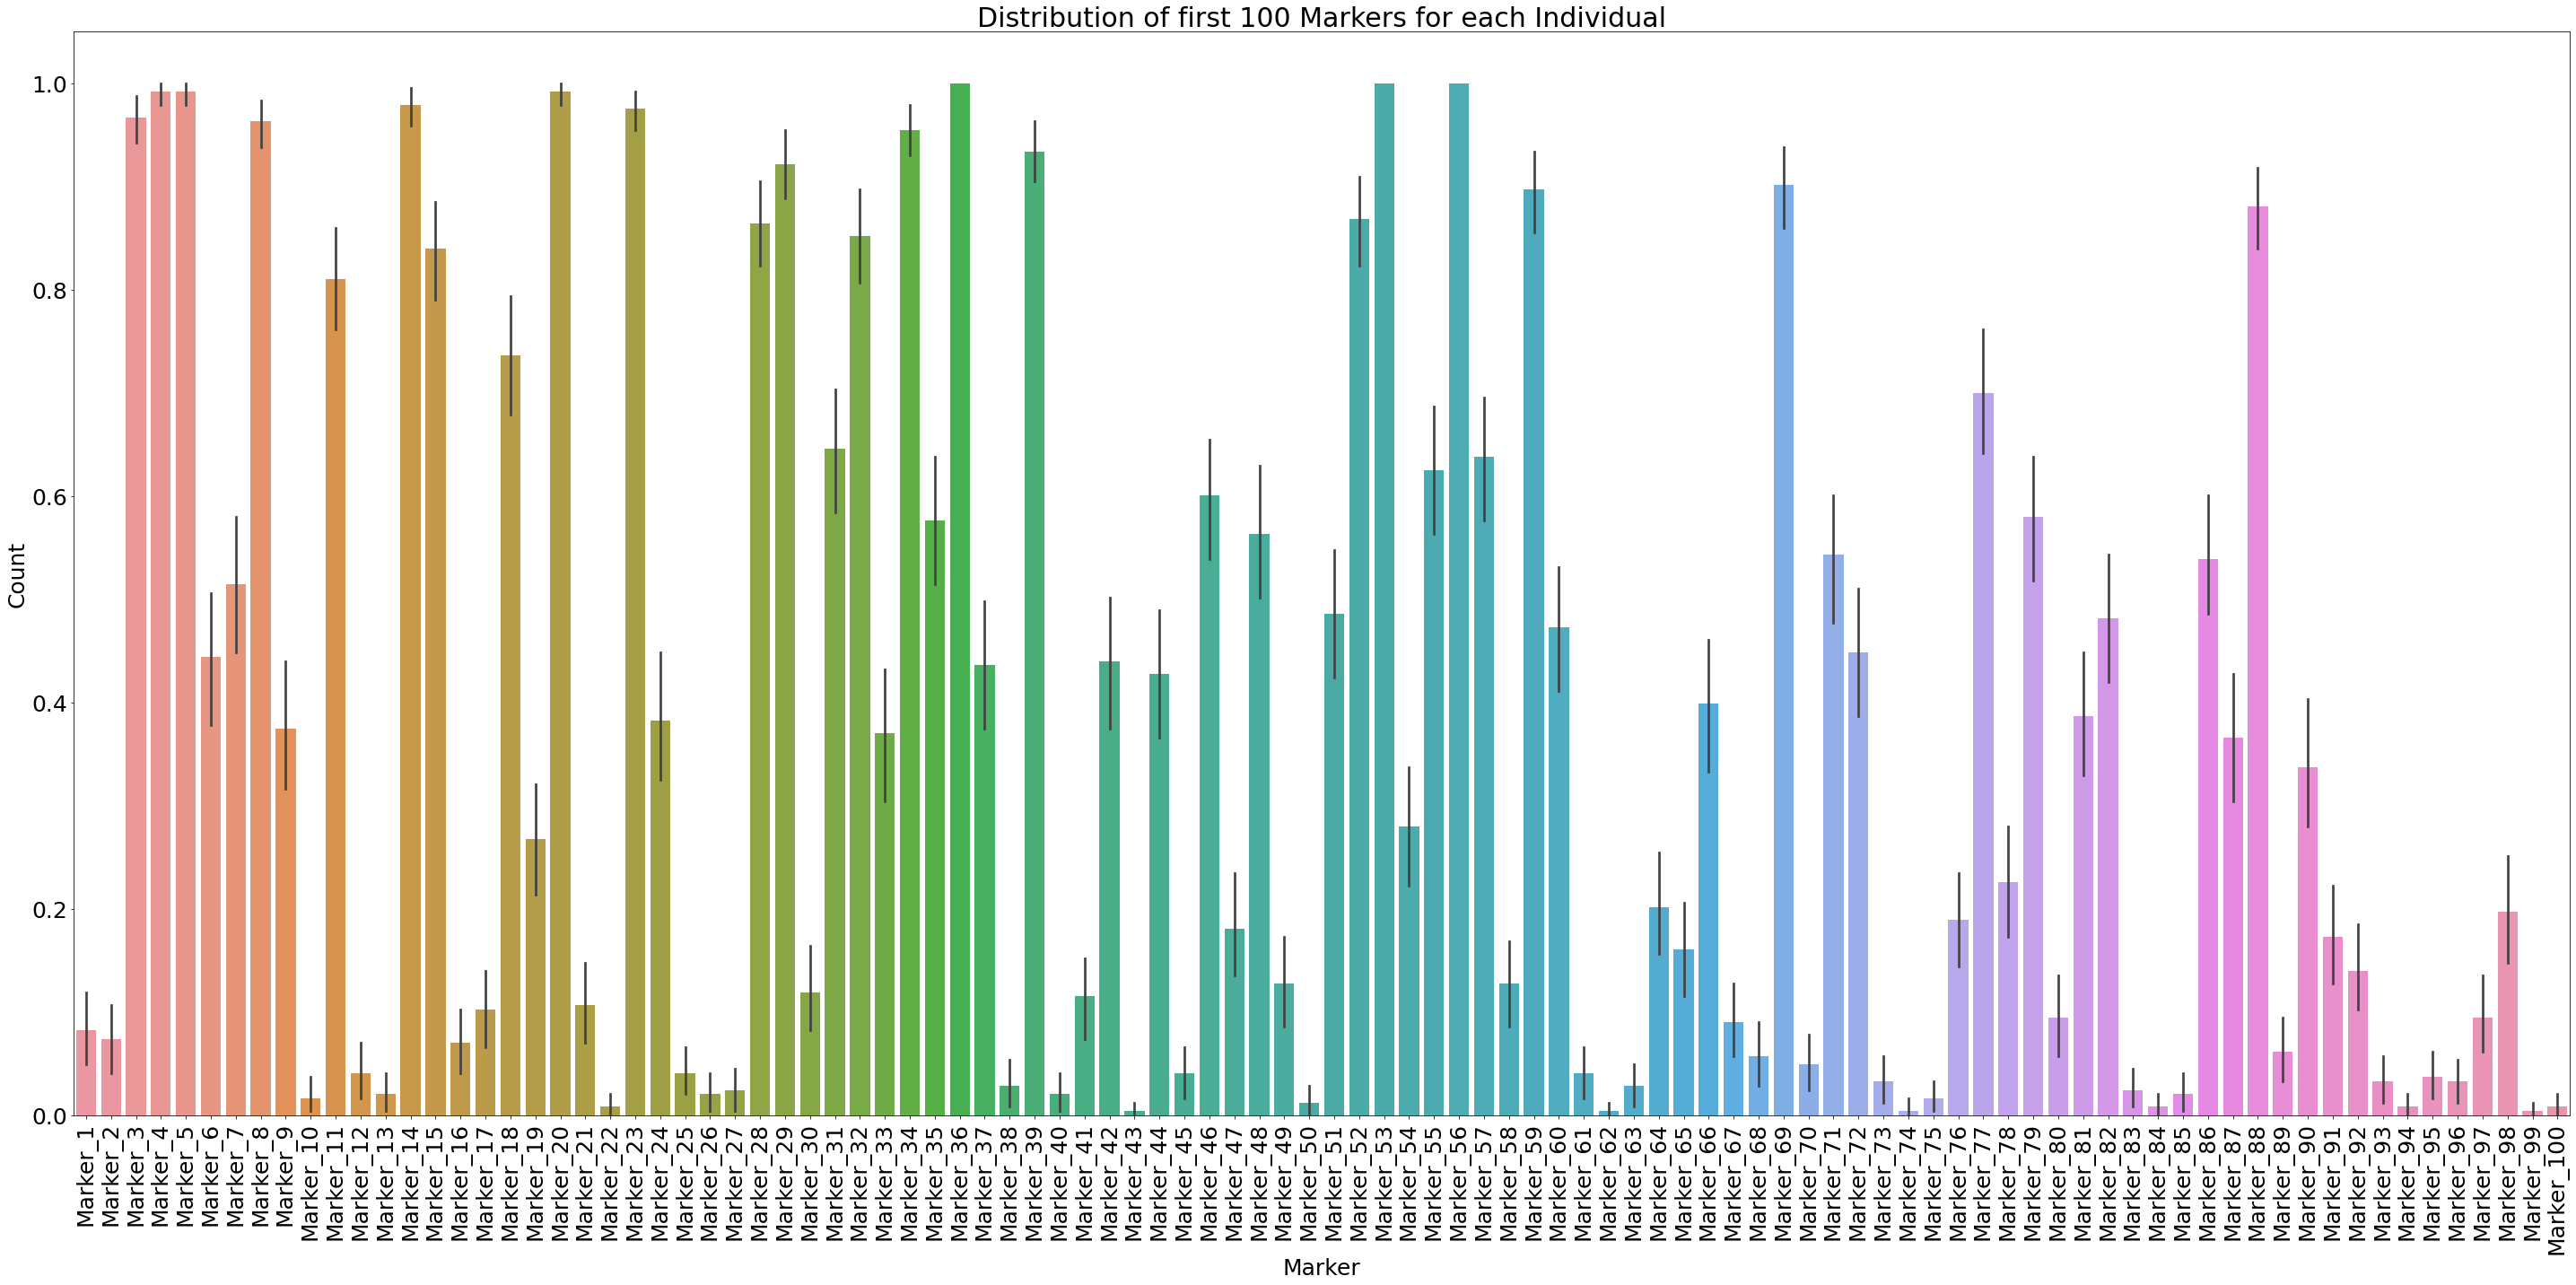

In [6]:
# Set a larger figure size
plt.figure(figsize=(40, 20))

# Subset the DataFrame for the first 100 markers
df_subset = df.iloc[:, :101]

# Create a bar plot to visualize the distribution of each marker for the 'Individual' column
ax = sns.barplot(data=df_subset)
ax.set_title('Distribution of first 100 Markers for each Individual', fontsize=30)  # Set the title font size

# Set x and y axis labels and increase tick label font size
ax.set_xlabel('Marker', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)  # Adjust the fontsize as per your preference

plt.tight_layout()
plt.show()


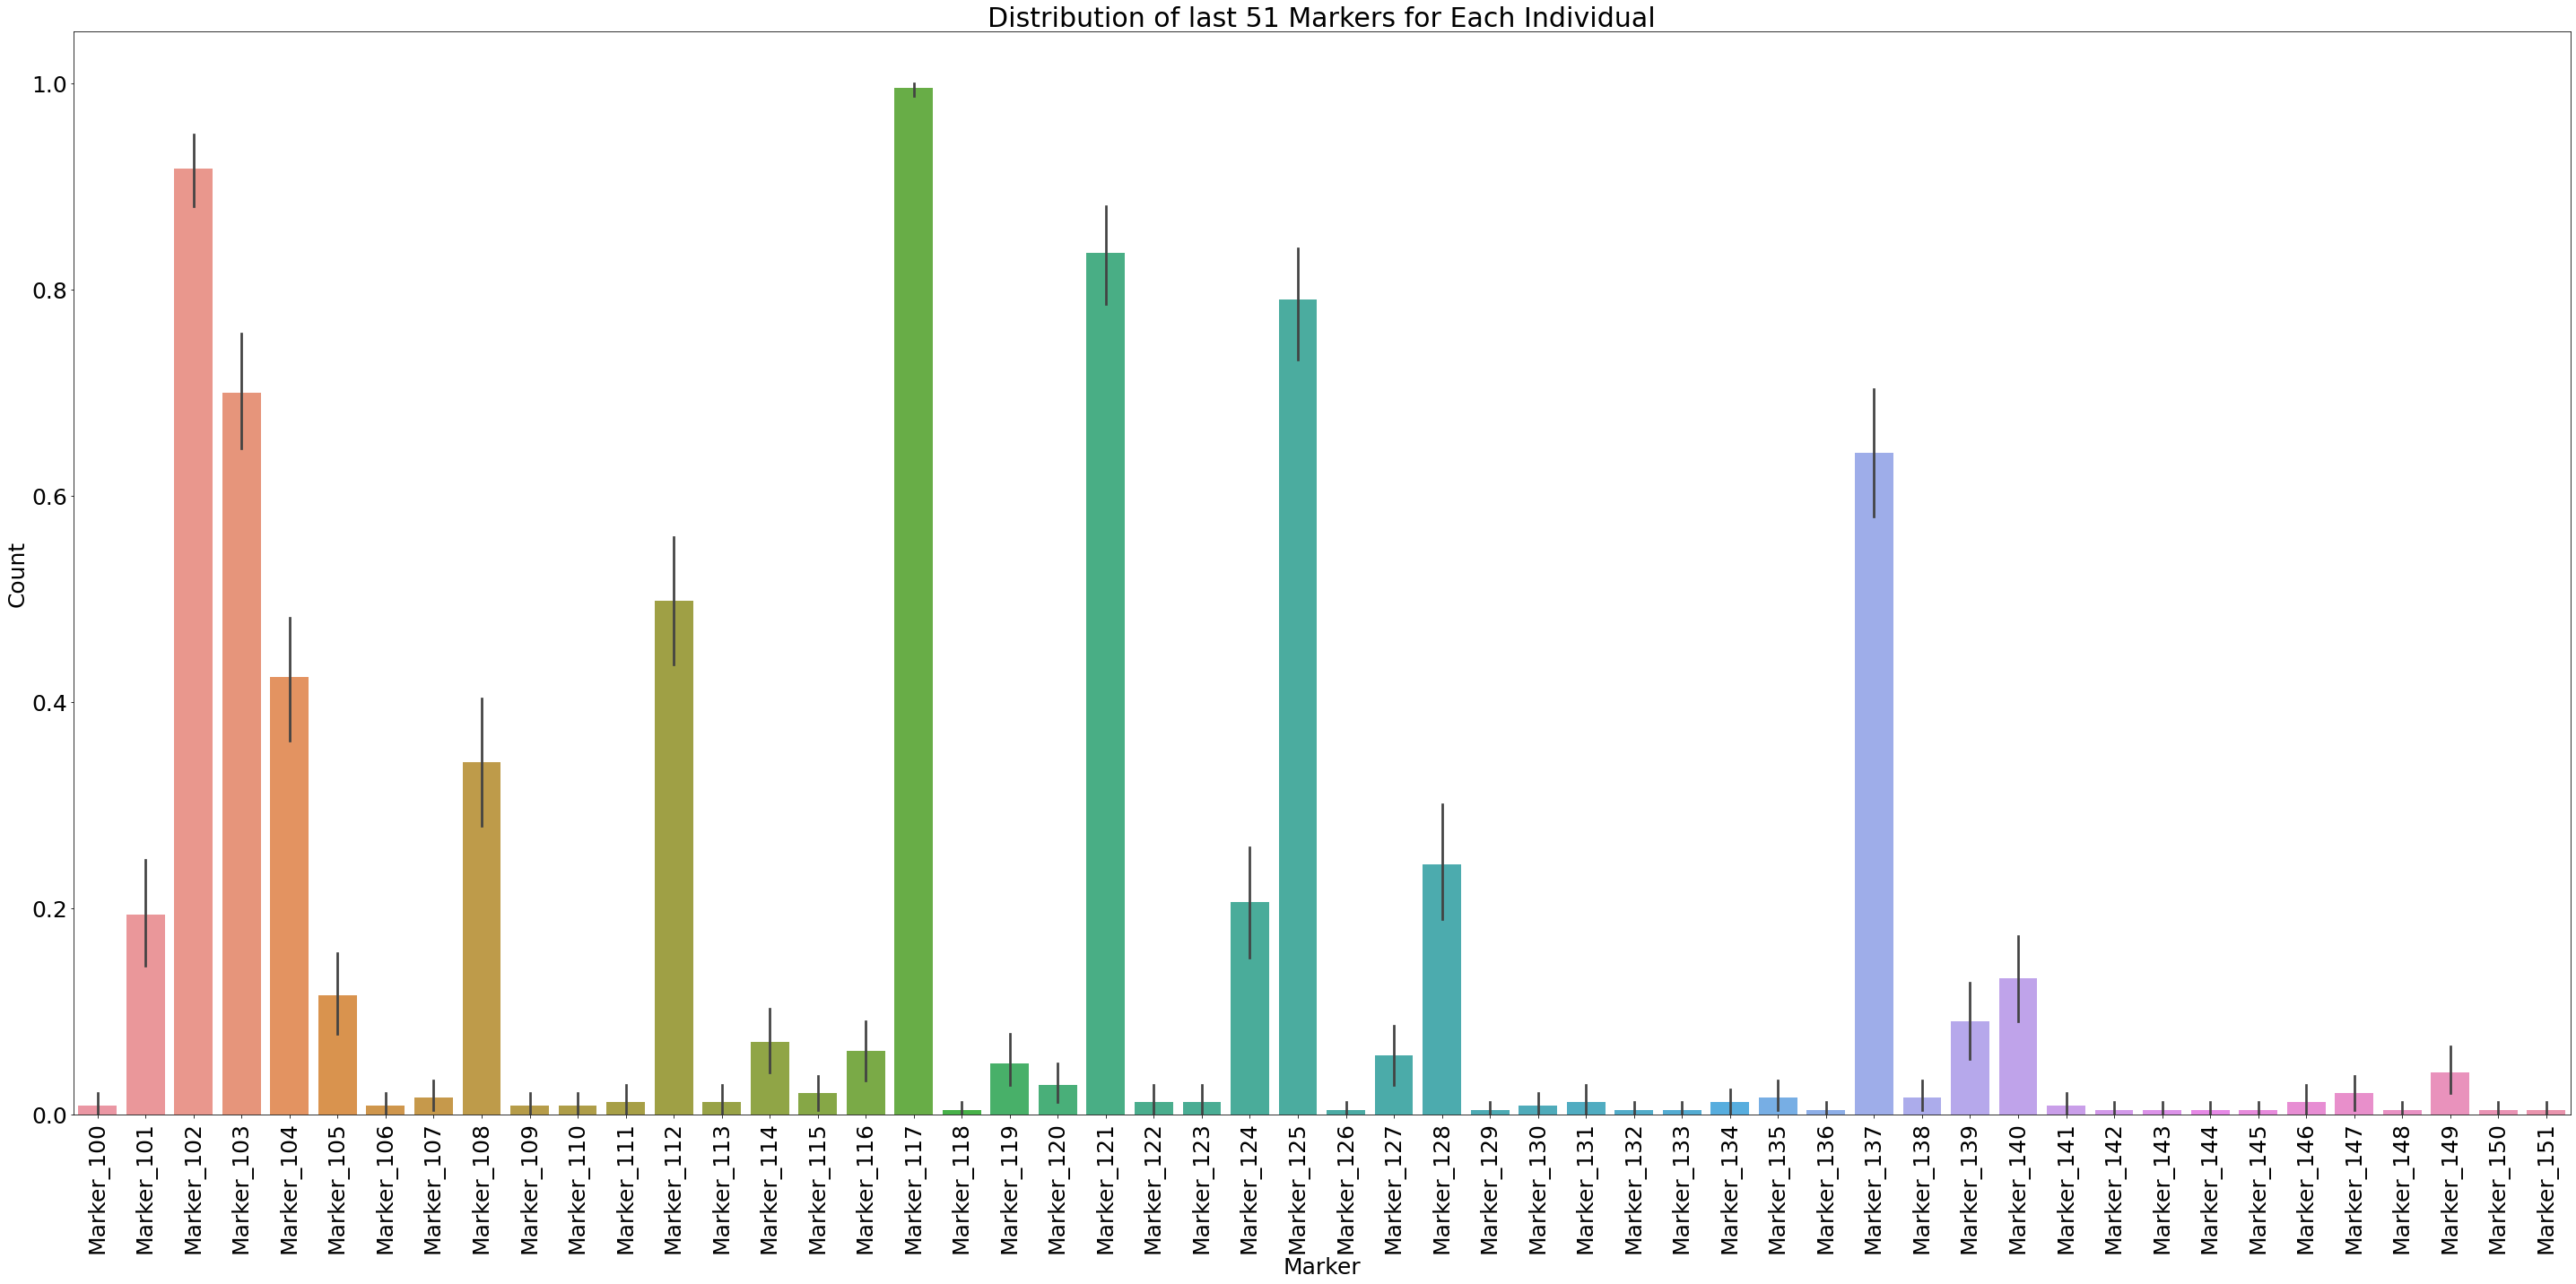

In [7]:
# Set a larger figure size
plt.figure(figsize=(40, 20))

# Subset the DataFrame for the last 51 markers
df_subset = df.iloc[:, -52:]

# Create a bar plot to visualize the distribution of each marker for the 'Individual' column
ax = sns.barplot(data=df_subset)
ax.set_title('Distribution of last 51 Markers for Each Individual', fontsize=30)  # Set the title font size

# Set x and y axis labels and increase tick label font size
ax.set_xlabel('Marker', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)  # Adjust the fontsize as per your preference

plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display


In [4]:
def create_boxplot(selected_markers):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[selected_markers])
    plt.title('Distribution of Selected Markers')
    plt.xlabel('Marker')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Get a list of all markers (excluding 'Individual' column)
all_markers = df.columns[1:]


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Create the dropdown widget with a placeholder option
marker_dropdown = widgets.Dropdown(options=['Please select'] + list(all_markers), description='Select Marker')

# Define the interaction function
def on_dropdown_change(change):
    selected_marker = change.new
    if selected_marker != 'Please select':
        create_boxplot([selected_marker])

# Attach the interaction function to the widget
marker_dropdown.observe(on_dropdown_change, names='value')

# Display the interactive widget
display(marker_dropdown)


Dropdown(description='Select Marker', options=('Please select', 'Marker_1', 'Marker_2', 'Marker_3', 'Marker_4'…

Dropdown(description='Select Subset', options=('Please select', 'Subset 1', 'Subset 2', 'Subset 3', 'Subset 4'…

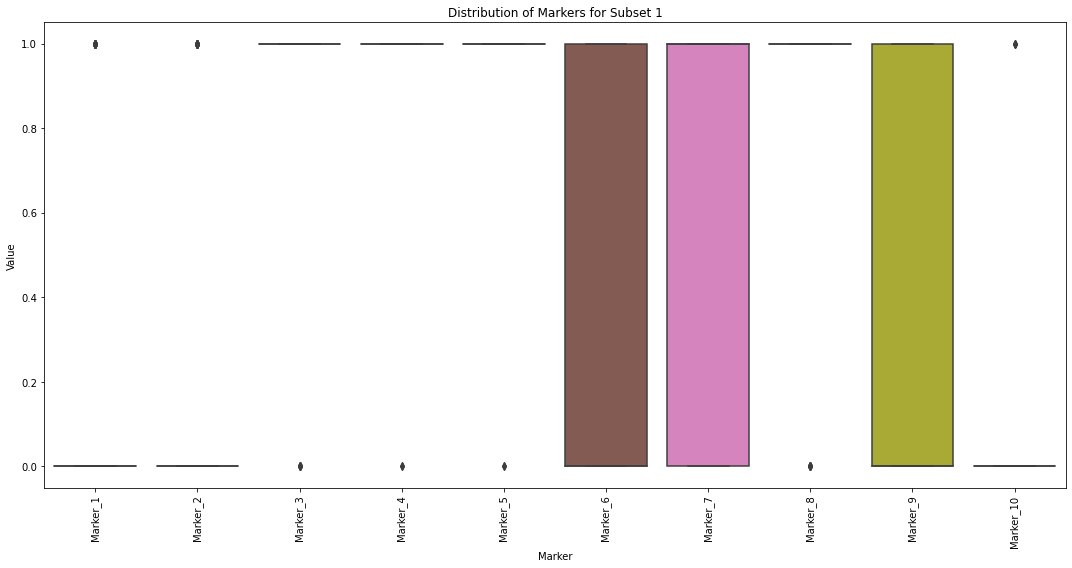

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Create a list of all markers
all_markers = list(df.columns[1:])

# Create a list of subsets, each containing 10 markers except for the last one
num_markers_per_subset = 10
num_subsets = (len(all_markers) + num_markers_per_subset - 1) // num_markers_per_subset
marker_subsets = [all_markers[i:i+num_markers_per_subset] for i in range(0, len(all_markers), num_markers_per_subset)]

# Add the last subset with 11 markers (due to odd number)
marker_subsets[-1].extend(all_markers[num_subsets * num_markers_per_subset:])

# Subset selection widget
subset_dropdown = widgets.Dropdown(options=['Please select'] + [f'Subset {i+1}' for i in range(num_subsets)], description='Select Subset')

# Define a function to create and display visualizations
def visualize_subset(selected_subset):
    if selected_subset != 'Please select':
        selected_markers = marker_subsets[int(selected_subset.split()[1]) - 1]
        
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=df[selected_markers])
        plt.title(f'Distribution of Markers for {selected_subset}')
        plt.xlabel('Marker')
        plt.ylabel('Value')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Attach the interaction function to the subset dropdown
subset_dropdown.observe(lambda change: visualize_subset(change.new), names='value')

# Display the interactive subset selection dropdown
display(subset_dropdown)


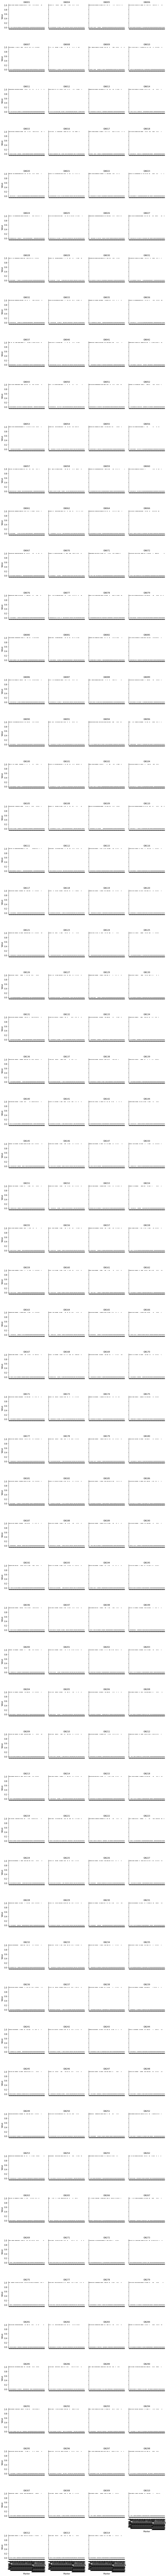

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the markers into multiple columns for facet grid
num_cols = 4  # Number of columns in the facet grid
marker_chunks = [selected_markers[i:i+num_cols] for i in range(0, len(selected_markers), num_cols)]

# Create a facet grid of subplots
g = sns.FacetGrid(df.melt(id_vars=['Individual']), col='Individual', col_wrap=num_cols)
g.map_dataframe(sns.boxplot, x='variable', y='value', order=selected_markers)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Marker", "Value")
g.set_xticklabels(rotation=90)

plt.tight_layout()
plt.show()



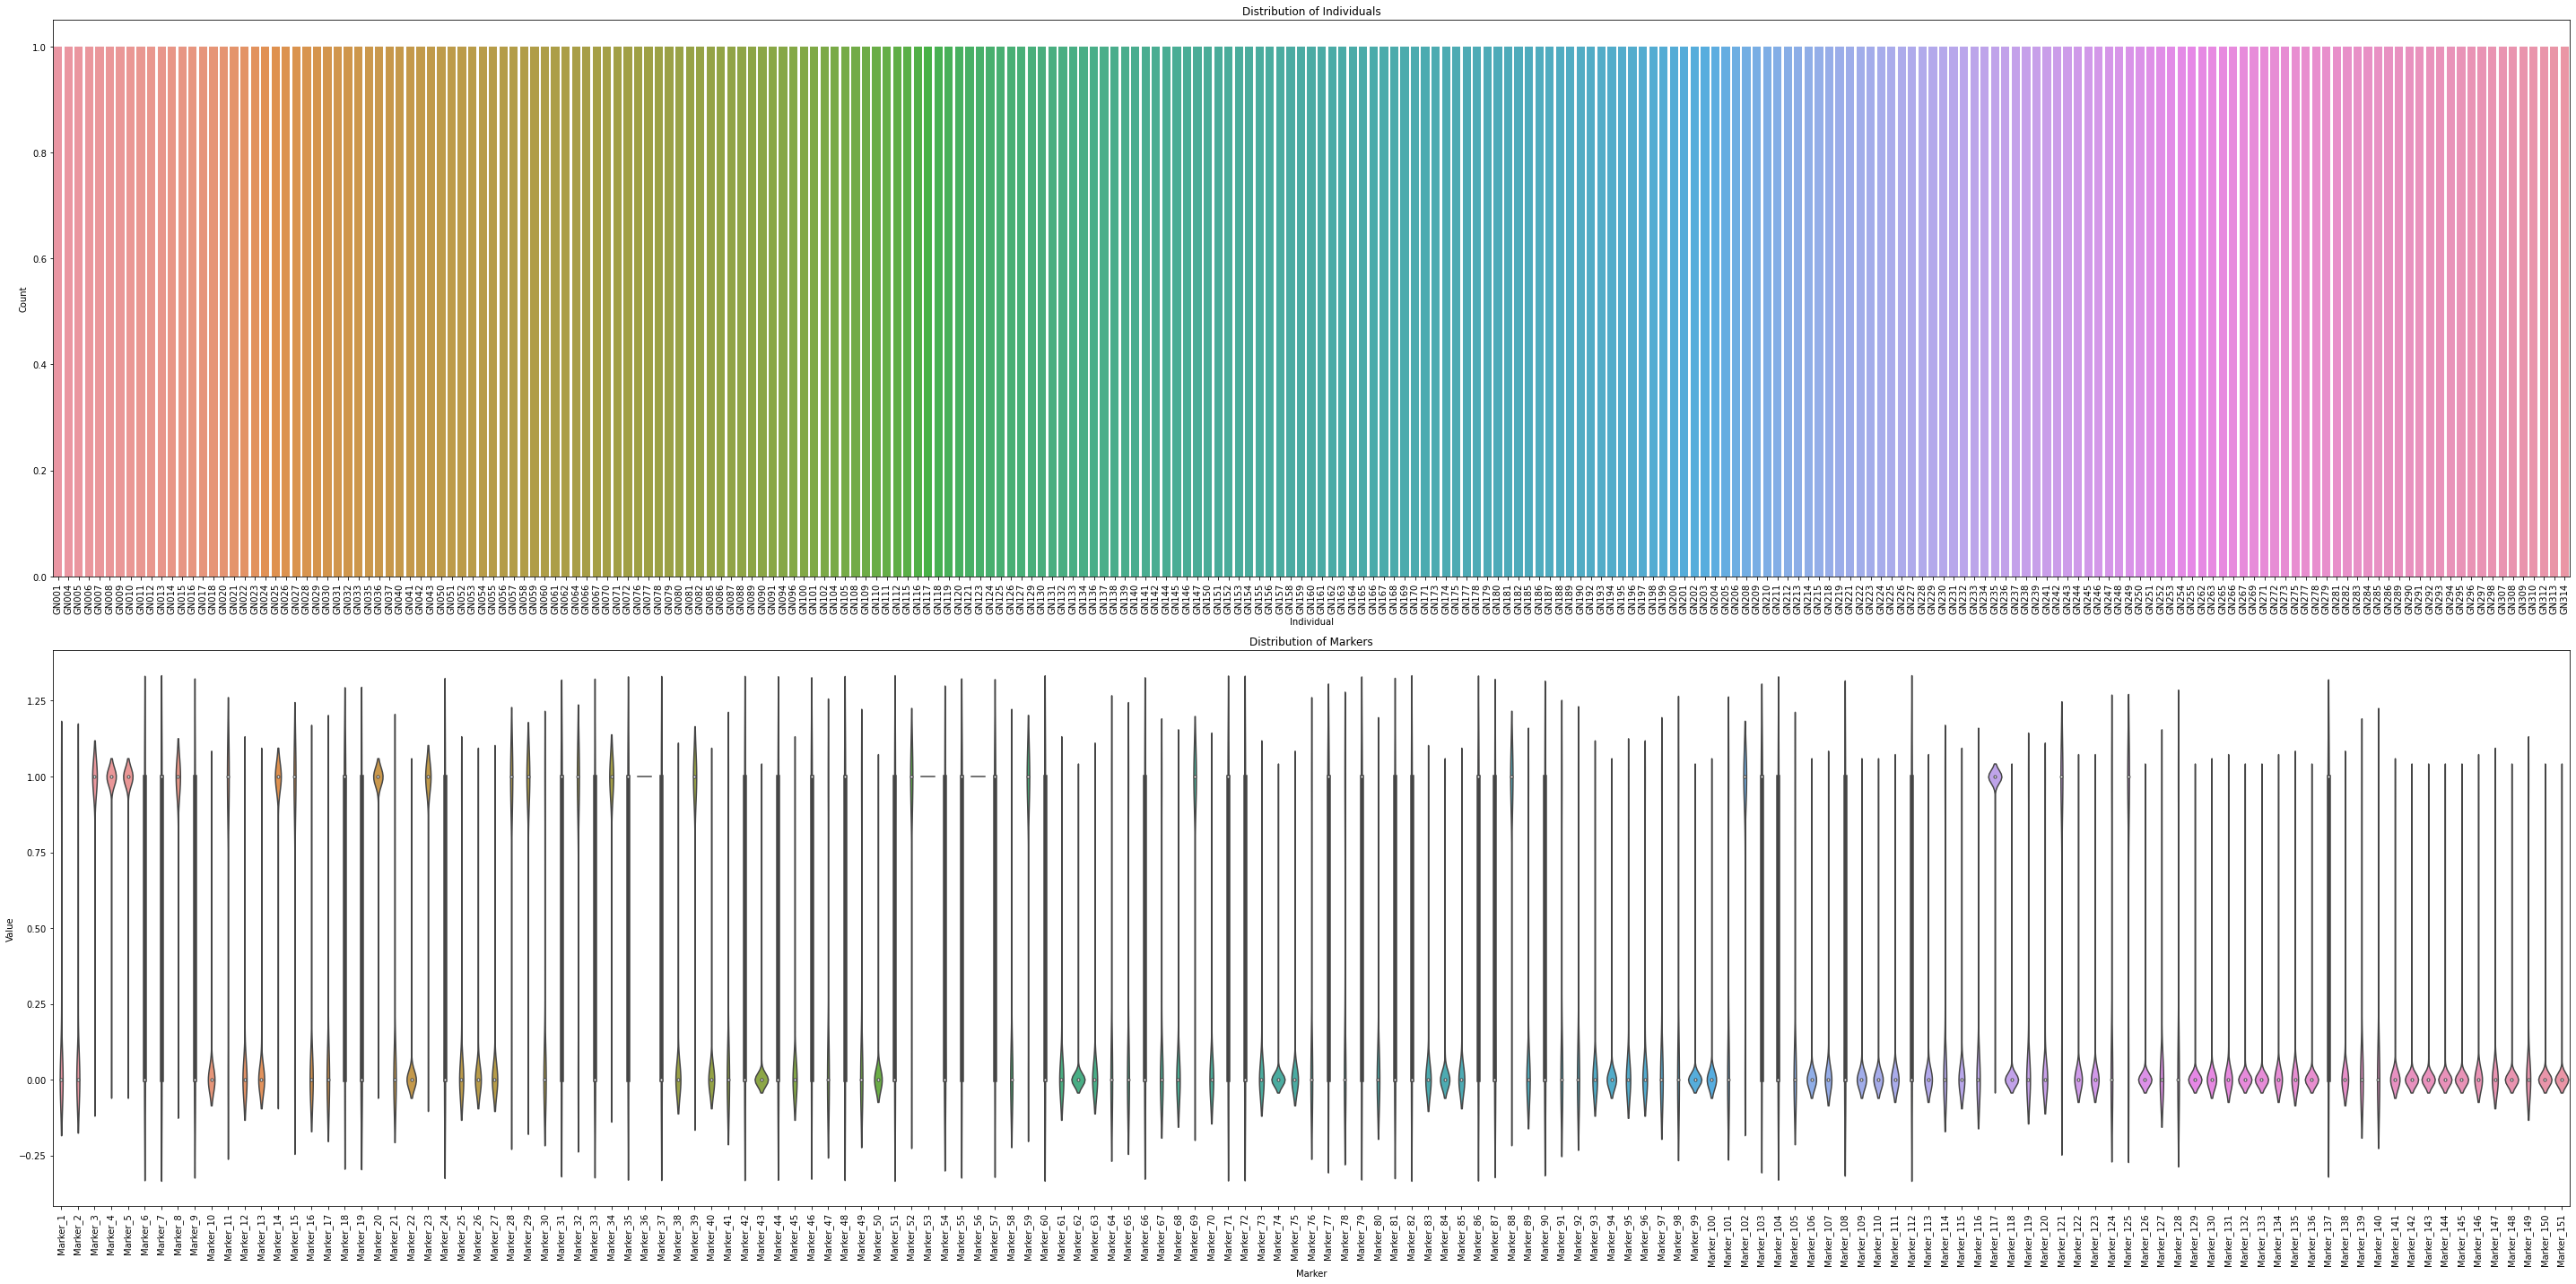

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a larger figure size
plt.figure(figsize=(40, 20))

# Visualize the distribution of the target variable ('Individual')
plt.subplot(2, 1, 1)
sns.countplot(x='Individual', data=df)
plt.title('Distribution of Individuals')
plt.xlabel('Individual')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Visualize the distribution of the markers using a violin plot
plt.subplot(2, 1, 2)
sns.violinplot(data=df[selected_markers])
plt.title('Distribution of Markers')
plt.xlabel('Marker')
plt.ylabel('Value')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**Correlation Matrix**

In [7]:
#encode for Individual feature 
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame to preserve the original data
df_encoded = df.copy()

# Encode the 'Individual' column
label_encoder = LabelEncoder()
df_encoded['Individual'] = label_encoder.fit_transform(df_encoded['Individual'])

# # Display the updated DataFrame
# df_encoded.head()

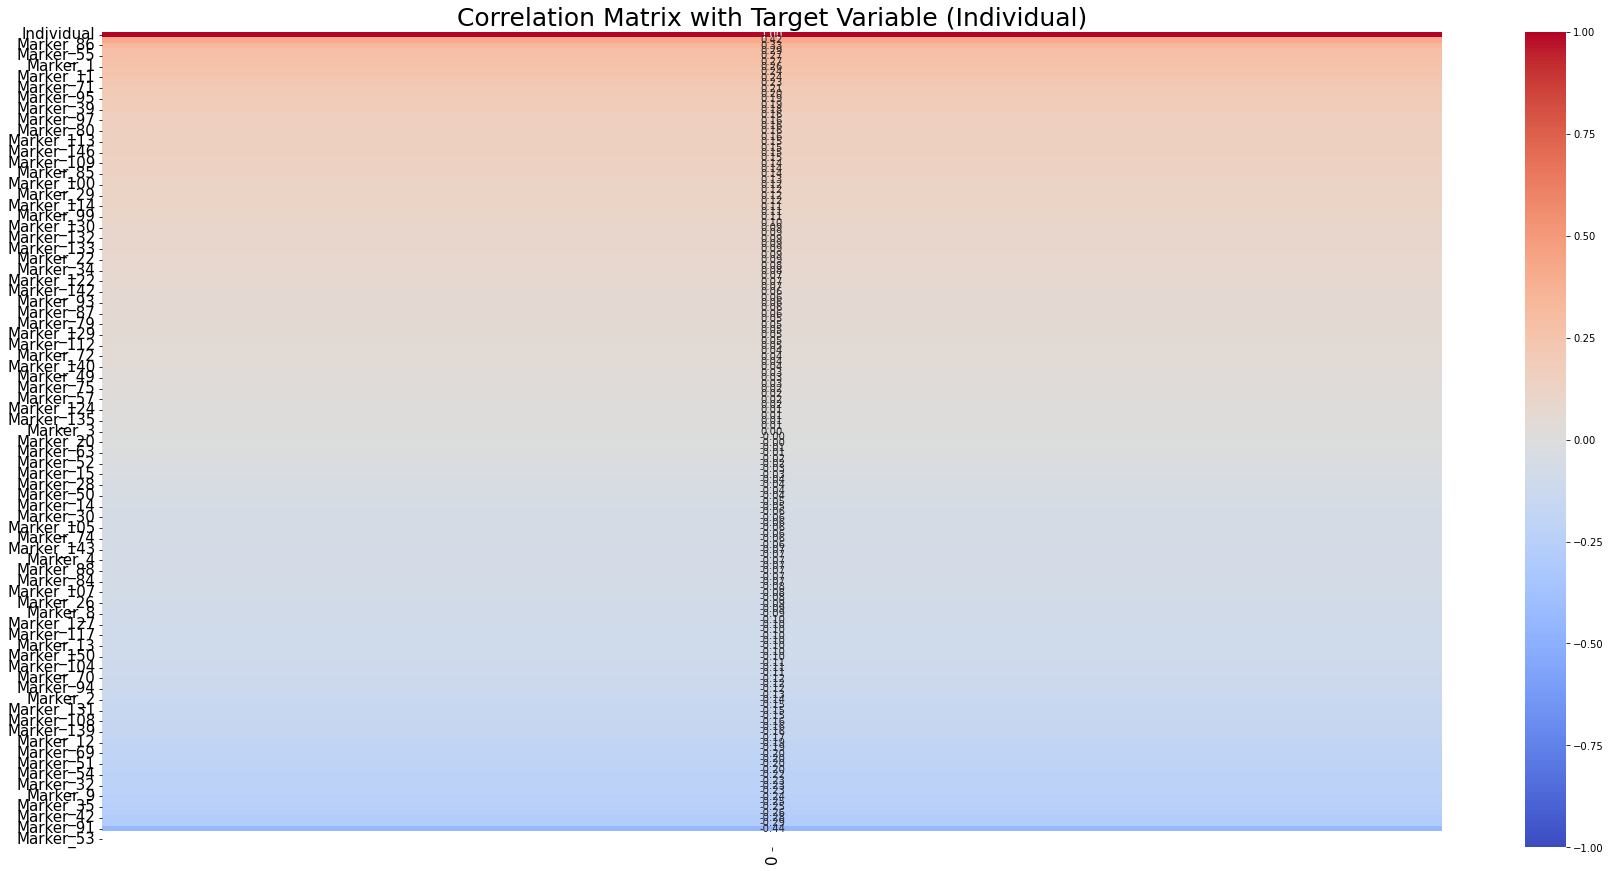

In [8]:
# correlation matrix
import numpy as np

# Calculate the correlation matrix between the markers and the target variable ('Individual')
correlation_matrix = df_encoded.corrwith(df_encoded['Individual'])

# Sort the correlations in descending order to identify the most positively and negatively correlated features
sorted_correlations = correlation_matrix.sort_values(ascending=False)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix with Target Variable (Individual)', fontsize=25)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.show()

**Create sorted subsets of the Correlation Matrix**

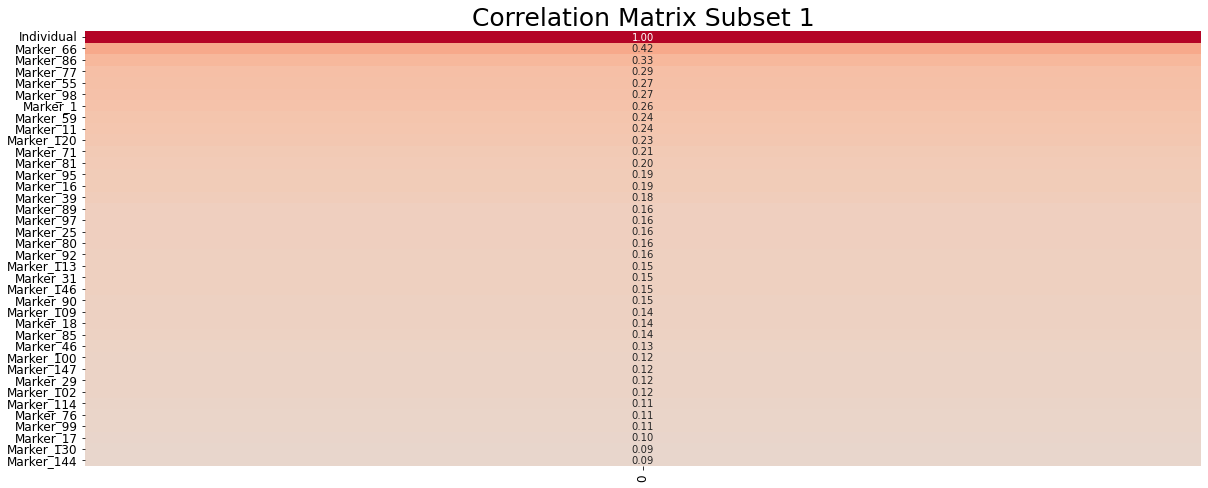

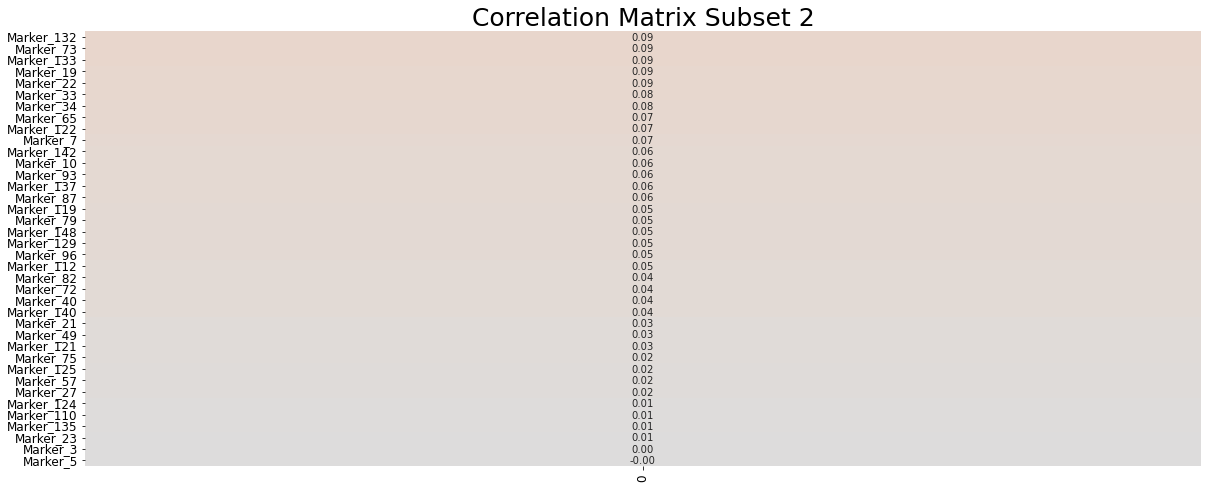

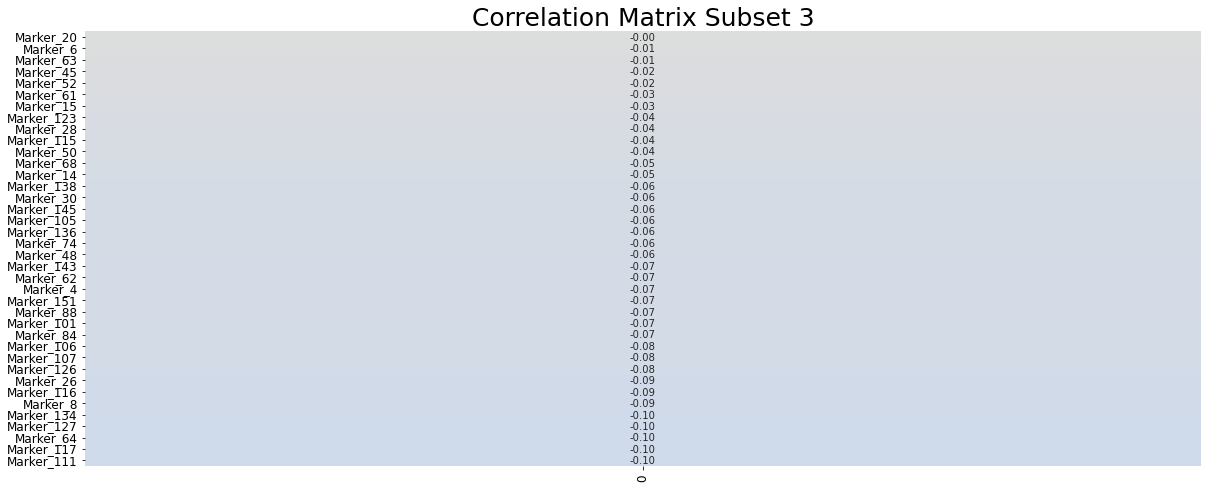

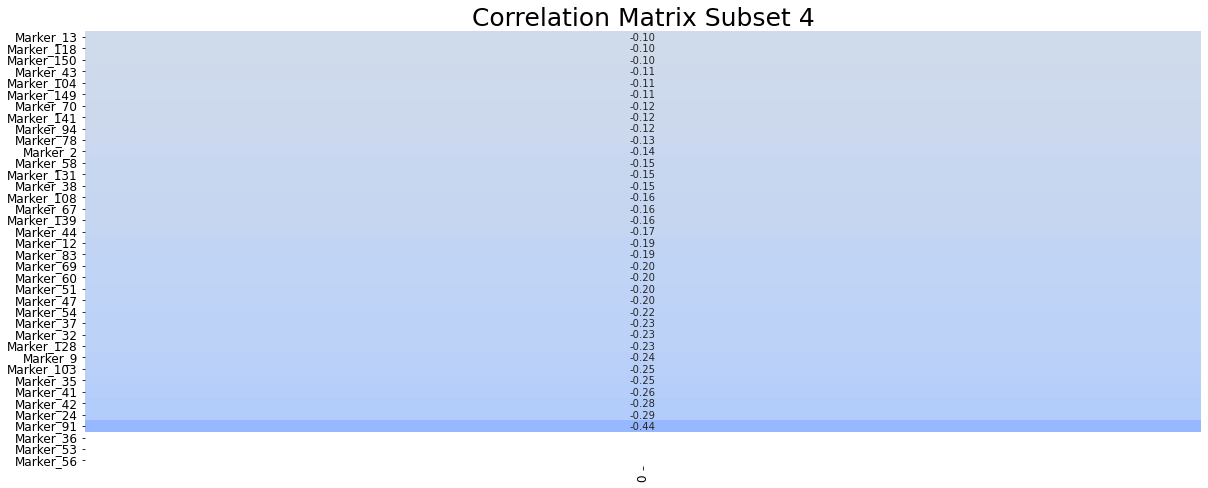

In [9]:
# Calculate the correlation matrix between the markers and the target variable ('Individual')
correlation_matrix = df_encoded.corrwith(df_encoded['Individual'])

# Sort the correlations in descending order to identify the most positively and negatively correlated features
sorted_correlations = correlation_matrix.sort_values(ascending=False)

# Slice the correlation matrix into subsets
num_subsets = 4
subset_size = len(sorted_correlations) // num_subsets

# Plot each subset of the correlation matrix as a separate heatmap
for i in range(num_subsets):
    start_idx = i * subset_size
    end_idx = (i + 1) * subset_size
    subset = sorted_correlations.iloc[start_idx:end_idx]
    
    plt.figure(figsize=(20, 8))
    ax = sns.heatmap(subset.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", cbar=False)
    plt.title(f'Correlation Matrix Subset {i+1}', fontsize=25)
    plt.xticks(fontsize=12, rotation=90)
#     rotate_yticks(ax, rotation=0)  # Rotate y-axis tick labels
#     plt.yticks(fontsize=12)  # Increase font size for y-axis tick labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0)  # Rotate y-axis tick labels
    
    plt.show()

# Get Feature Importances

        Feature  Importance
81    Marker_82    0.017539
5      Marker_6    0.016625
71    Marker_72    0.016384
6      Marker_7    0.015702
102  Marker_103    0.015643
..          ...         ...
147  Marker_148    0.000331
135  Marker_136    0.000296
52    Marker_53    0.000000
55    Marker_56    0.000000
35    Marker_36    0.000000

[151 rows x 2 columns]


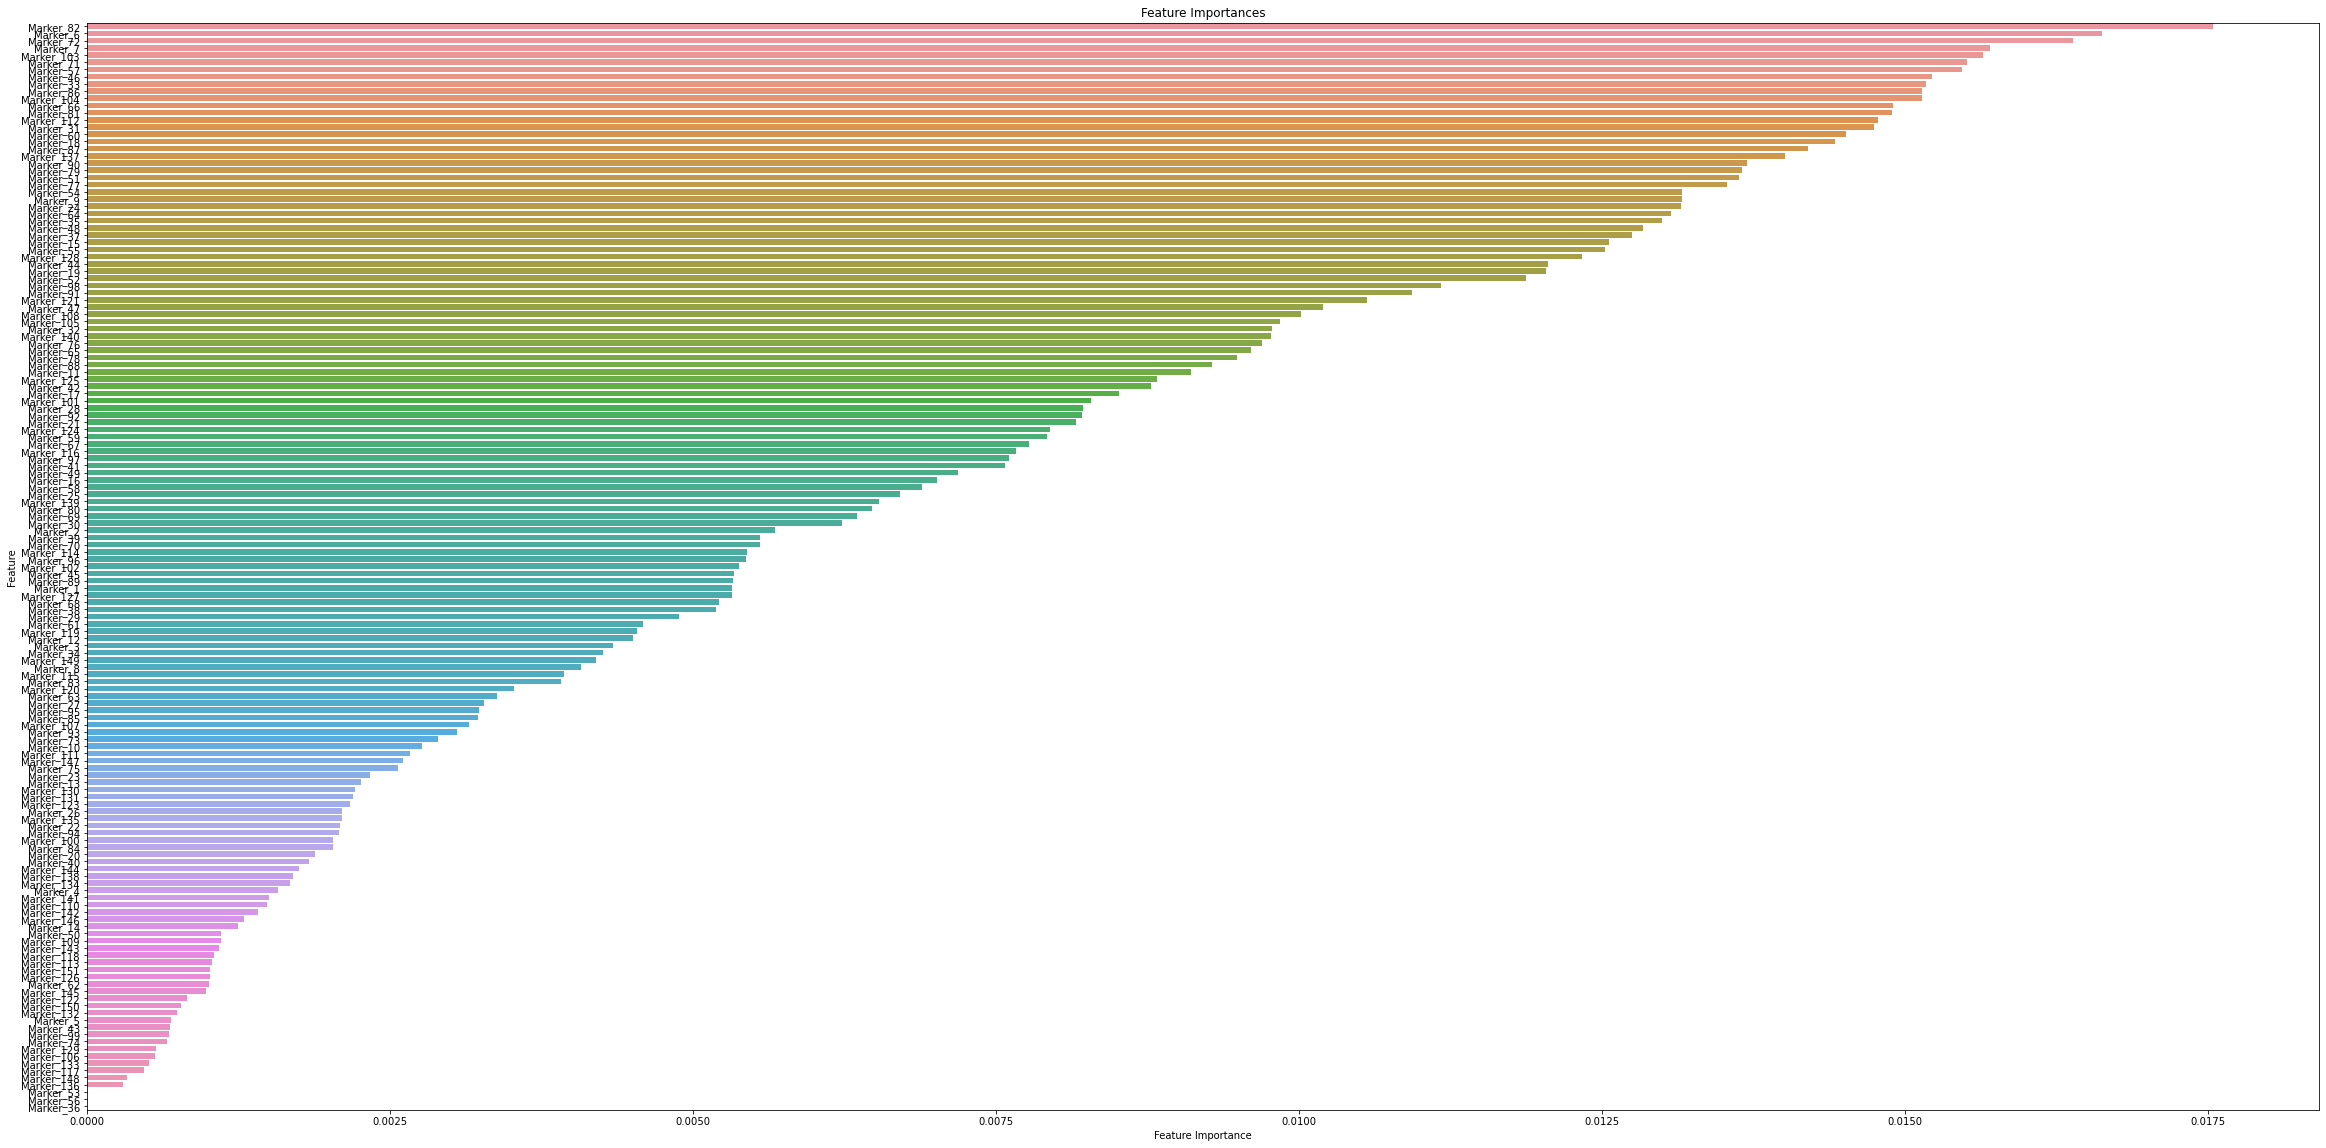

In [3]:
# Separate features (X) and target (y)
X = df.drop('Individual', axis=1)
y = df['Individual']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Optionally, you can plot the feature importances
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [10]:
# importance_df
# Set option to display all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Now when you print the dataframe, it will display all rows and columns
# print(importance_df)
importance_df.head()

,Feature,Importance
81,Marker_82,0.017539
5,Marker_6,0.016625
71,Marker_72,0.016384
6,Marker_7,0.015702
102,Marker_103,0.015643


# **Bootstrap**

In [7]:
# Number of bootstrap samples
num_bootstrap_samples = 1000

# Create an empty list to store the bootstrap samples
bootstrap_samples = []

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Randomly select rows from the original dataset with replacement
    bootstrap_sample = X.sample(n=len(X), replace=True)
    bootstrap_samples.append(bootstrap_sample)

# 'bootstrap_samples' is now a list of DataFrames, each representing a bootstrap sample


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 243 entries, ('KS', 'KS_Meade1') to ('WI', 'WI_SprGrn10')
Columns: 151 entries, Marker_1 to Marker_151
dtypes: float64(151)
memory usage: 288.7+ KB


In [9]:

# 'bootstrap_samples' is a list of DataFrames containing bootstrap samples

# List to store means for each feature
means = []

# Iterate through each feature column
for feature in X.columns:
    # Calculate the mean for each bootstrap sample
    feature_means = [sample[feature].mean() for sample in bootstrap_samples]
    # Calculate the overall mean for the feature
    feature_mean = np.mean(feature_means)
    # Append the feature mean to the list
    means.append(feature_mean)


In [7]:
# sorted_list_desc = sorted(my_list, reverse=True)
means
sorted_means=sorted(means, reverse=True)
sorted_means

[1.0,
 1.0,
 1.0,
 0.995946502057613,
 0.9917901234567901,
 0.9917695473251028,
 0.9915679012345678,
 0.9791646090534979,
 0.9755925925925926,
 0.9668683127572015,
 0.9624691358024692,
 0.9546625514403293,
 0.9340041152263375,
 0.9222345679012346,
 0.9180987654320989,
 0.9009053497942386,
 0.8972345679012347,
 0.8797818930041152,
 0.8682057613168724,
 0.8637530864197531,
 0.8507736625514404,
 0.8411604938271605,
 0.8357119341563787,
 0.8104814814814815,
 0.7895144032921811,
 0.7374732510288066,
 0.7004938271604938,
 0.6997818930041153,
 0.6465308641975308,
 0.6398189300411523,
 0.6378271604938271,
 0.6251687242798353,
 0.6013497942386831,
 0.581119341563786,
 0.575641975308642,
 0.5631358024691357,
 0.5438888888888889,
 0.5393580246913581,
 0.5147777777777778,
 0.4966049382716049,
 0.4841234567901234,
 0.482395061728395,
 0.4746666666666667,
 0.44800823045267485,
 0.4447448559670782,
 0.4403909465020577,
 0.4353374485596708,
 0.4276831275720165,
 0.4249794238683128,
 0.4005432098765432

In [8]:

# 'bootstrap_samples' is a list of DataFrames containing bootstrap samples

# List to store means for each feature along with feature names
feature_means = []

# Iterate through each feature column
for feature in X.columns:
    # Calculate the mean for each bootstrap sample
    feature_means_per_sample = [sample[feature].mean() for sample in bootstrap_samples]
    # Calculate the overall mean for the feature
    feature_mean = np.mean(feature_means_per_sample)
    # Append the feature name and mean to the list as a tuple
    feature_means.append((feature, feature_mean))

# Create a DataFrame from the list of feature names and means
feature_means_df = pd.DataFrame(feature_means, columns=['Feature', 'Mean'])

# Sort the DataFrame based on the means in descending order
sorted_feature_means_df = feature_means_df.sort_values(by='Mean', ascending=False)

# print(sorted_feature_means_df)
sorted_feature_means_df.head()

,Feature,Mean
55,Marker_56,1.000000
35,Marker_36,1.000000
52,Marker_53,1.000000
116,Marker_117,0.995947
19,Marker_20,0.991790


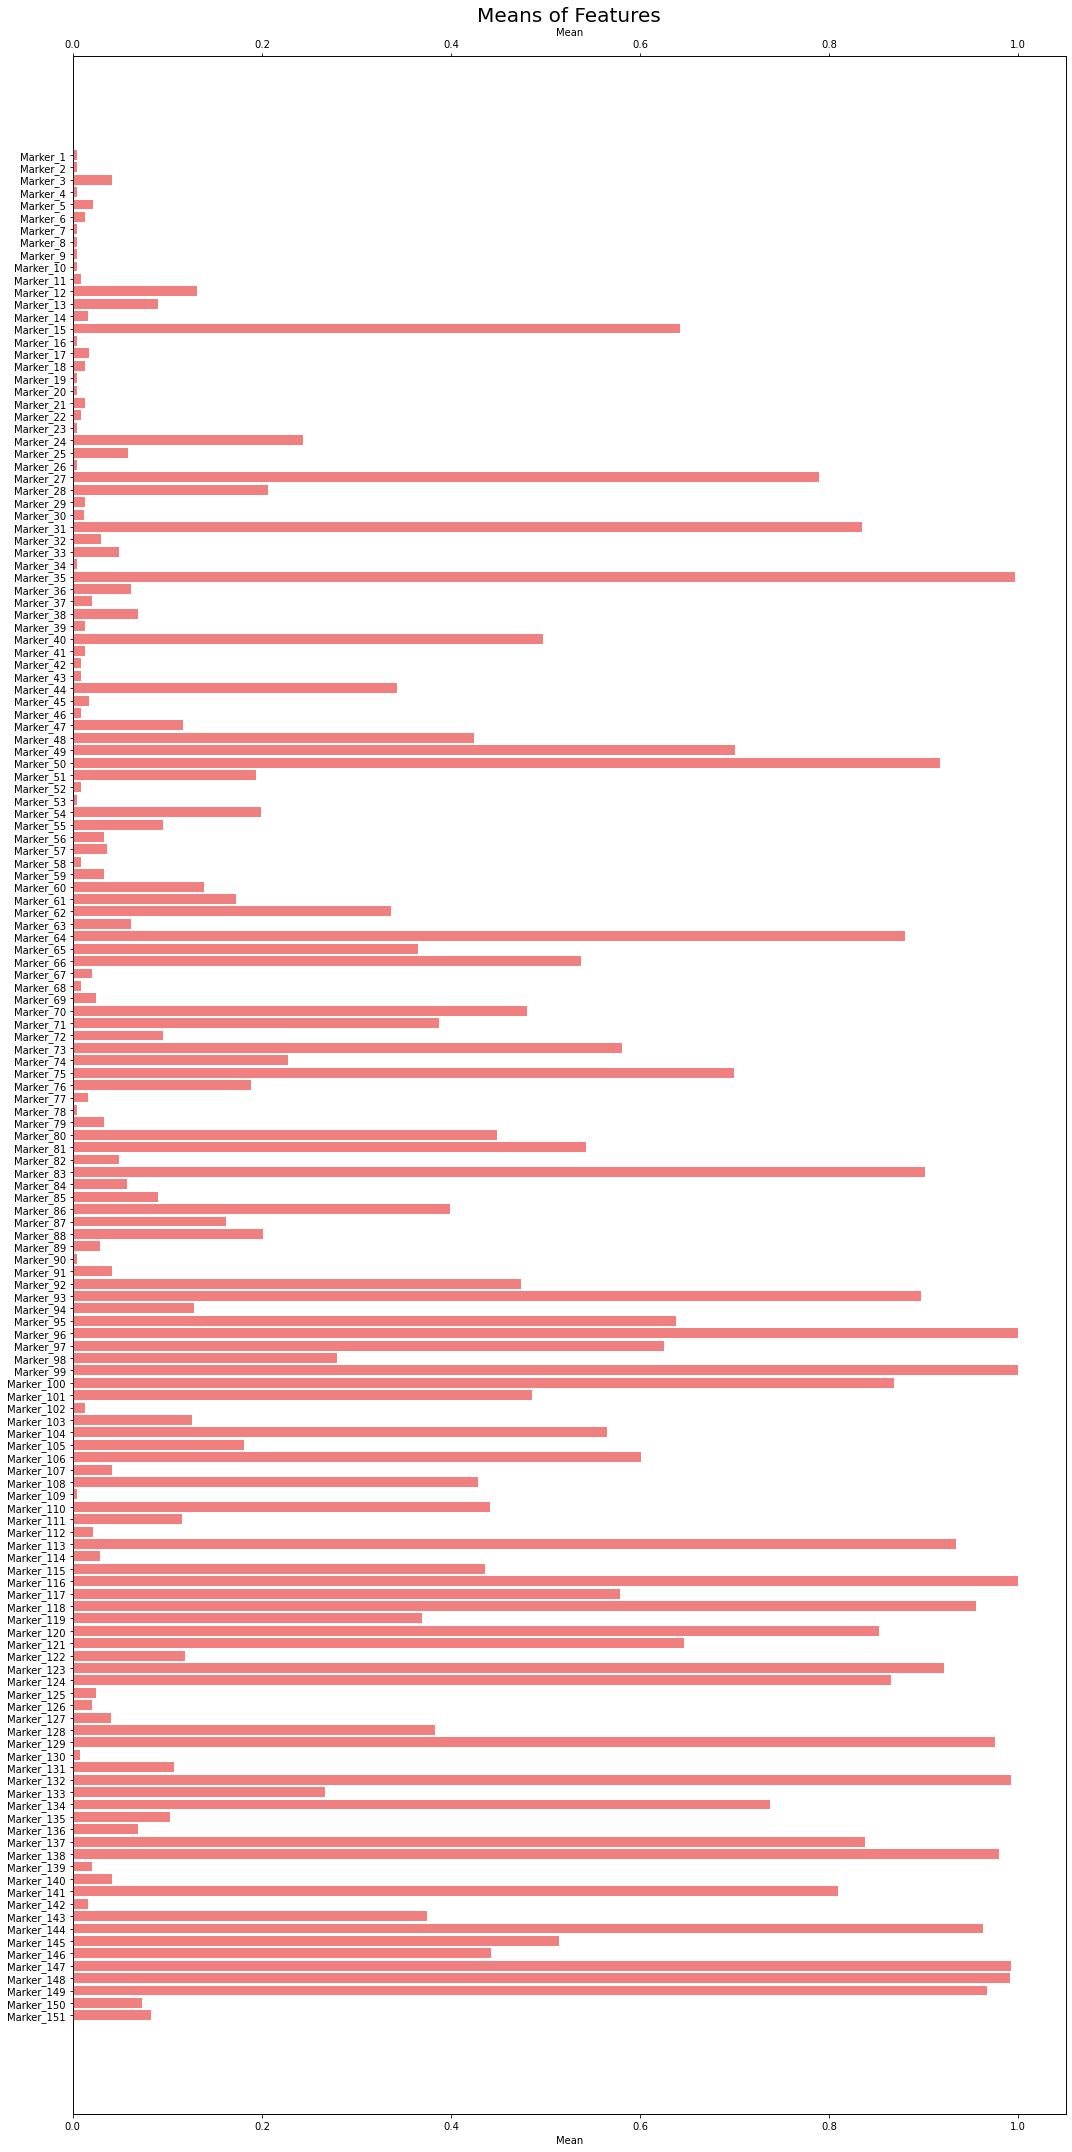

In [25]:
import matplotlib.pyplot as plt

# Assuming 'means' is the list containing the mean values for each feature
# Create a list of feature names (assuming the original DataFrame columns are used as feature names)
feature_names = X.columns.tolist()

# Reverse the order of feature names and means
feature_names = feature_names[::-1]
means = means[::-1]

# Plot the means as a vertical bar plot
fig, ax = plt.subplots(figsize=(15, 30))  # Set the figure size (adjust as needed)

# Create a secondary x-axis at the top
ax2 = ax.twiny()

# Plot the means on the primary x-axis
ax.barh(feature_names, means, color='skyblue')  # Use plt.barh for a horizontal bar plot
ax.set_xlabel('Mean')

# Plot the means on the secondary x-axis (top)
ax2.barh(feature_names, means, color='lightcoral')  # Use plt.barh for a horizontal bar plot
ax2.set_xlabel('Mean')

plt.ylabel('Feature')
plt.title('Means of Features', fontsize=20)  # Increase the title size (adjust as needed)
plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()


# Confidence Intervals

In [9]:


# List to store the confidence intervals for each feature
confidence_intervals = {}

# Iterate through all the features in the DataFrame
for feature_name in X.columns:
    # Calculate the bootstrapped means for the current feature
    ci_means = [sample[feature_name].mean() for sample in bootstrap_samples]

    # Define the confidence level (e.g., 95%)
    confidence_level = 0.95

    # Calculate the lower and upper percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile

    # Calculate the confidence interval using percentiles
    lower_ci = np.percentile(ci_means, lower_percentile * 100)
    upper_ci = np.percentile(ci_means, upper_percentile * 100)

    # Store the confidence interval in the dictionary
    confidence_intervals[feature_name] = (lower_ci, upper_ci)

# Print the confidence intervals for all features
for feature_name, (lower_ci, upper_ci) in confidence_intervals.items():
    print(f"Feature: {feature_name}, Confidence Interval ({confidence_level * 100:.1f}%): [{lower_ci:.3f}, {upper_ci:.3f}]")


Feature: Marker_1, Confidence Interval (95.0%): [0.049, 0.119]
Feature: Marker_2, Confidence Interval (95.0%): [0.045, 0.111]
Feature: Marker_3, Confidence Interval (95.0%): [0.942, 0.988]
Feature: Marker_4, Confidence Interval (95.0%): [0.979, 1.000]
Feature: Marker_5, Confidence Interval (95.0%): [0.979, 1.000]
Feature: Marker_6, Confidence Interval (95.0%): [0.383, 0.502]
Feature: Marker_7, Confidence Interval (95.0%): [0.453, 0.576]
Feature: Marker_8, Confidence Interval (95.0%): [0.938, 0.984]
Feature: Marker_9, Confidence Interval (95.0%): [0.317, 0.440]
Feature: Marker_10, Confidence Interval (95.0%): [0.000, 0.033]
Feature: Marker_11, Confidence Interval (95.0%): [0.761, 0.860]
Feature: Marker_12, Confidence Interval (95.0%): [0.016, 0.070]
Feature: Marker_13, Confidence Interval (95.0%): [0.004, 0.041]
Feature: Marker_14, Confidence Interval (95.0%): [0.963, 0.996]
Feature: Marker_15, Confidence Interval (95.0%): [0.794, 0.881]
Feature: Marker_16, Confidence Interval (95.0%): 

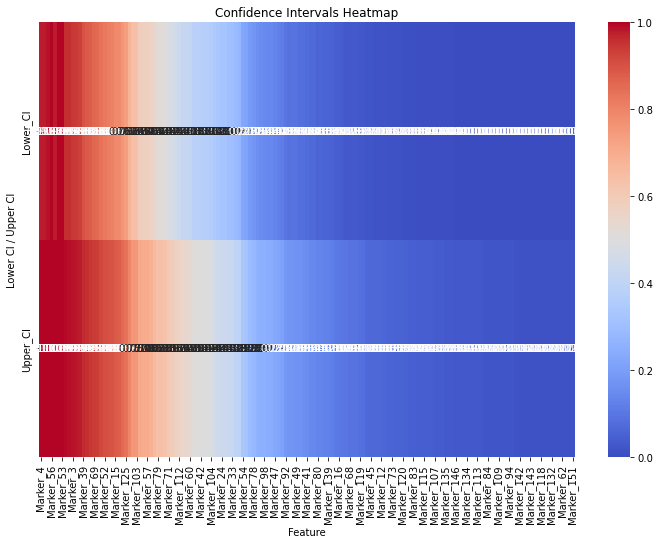

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the confidence intervals dictionary into a DataFrame
confidence_df = pd.DataFrame.from_dict(confidence_intervals, orient='index', columns=['Lower_CI', 'Upper_CI'])

# Sort the DataFrame by the upper bound of the confidence interval (for visualization)
confidence_df = confidence_df.sort_values(by='Upper_CI', ascending=False)

# Create a heatmap of the confidence intervals with features on the left
plt.figure(figsize=(12, 8))
sns.heatmap(confidence_df.T, cmap='coolwarm', annot=True, fmt='.3f', cbar=True)
plt.title('Confidence Intervals Heatmap')
plt.xlabel('Feature')
plt.ylabel('Lower CI / Upper CI')
plt.show()


In [10]:
# Isolate Markers. Check if both lower and upper bounds are equal to 1.0

# List to store the confidence intervals for each feature
confidence_intervals = {}

# Iterate through all the features in the DataFrame
for feature_name in X.columns:
    # Calculate the bootstrapped means for the current feature
    ci_means = [sample[feature_name].mean() for sample in bootstrap_samples]

    # Define the confidence level (e.g., 95%)
    confidence_level = 0.95

    # Calculate the lower and upper percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile

    # Calculate the confidence interval using percentiles
    lower_ci = np.percentile(ci_means, lower_percentile * 100)
    upper_ci = np.percentile(ci_means, upper_percentile * 100)

    # Check if both lower and upper bounds are equal to 1.0
    if lower_ci >= 1.0 and upper_ci == 1.0:
        # Store the confidence interval in the dictionary
        confidence_intervals[feature_name] = (lower_ci, upper_ci)

# Print the confidence intervals for features with bounds equal to 1.0
for feature_name, (lower_ci, upper_ci) in confidence_intervals.items():
    print(f"Feature: {feature_name}, Confidence Interval ({confidence_level * 100:.1f}%): [{lower_ci:.3f}, {upper_ci:.3f}]")


Feature: Marker_36, Confidence Interval (95.0%): [1.000, 1.000]
Feature: Marker_53, Confidence Interval (95.0%): [1.000, 1.000]
Feature: Marker_56, Confidence Interval (95.0%): [1.000, 1.000]


In [11]:
# Corroborate Markers. Determine if lower and upper bounds are equal to 1.0 by filtering dataset.

# Check if all values in each column are equal to 1
columns_with_only_1 = df.columns[(df == 1).all()]

# The variable 'columns_with_only_1' will contain a list of column names
# that only have values equal to 1

# You can then select only those columns from the original DataFrame
df_filtered = df[columns_with_only_1]
print(df_filtered)

                   Marker_36  Marker_53  Marker_56
State Location                                    
KS    KS_Meade1          1.0        1.0        1.0
      KS_Meade1          1.0        1.0        1.0
      KS_Meade1          1.0        1.0        1.0
      KS_Meade1          1.0        1.0        1.0
      KS_Meade1          1.0        1.0        1.0
...                      ...        ...        ...
WI    WI_SprGrn10        1.0        1.0        1.0
      WI_SprGrn10        1.0        1.0        1.0
      WI_SprGrn10        1.0        1.0        1.0
      WI_SprGrn10        1.0        1.0        1.0
      WI_SprGrn10        1.0        1.0        1.0

[243 rows x 3 columns]


In [23]:
#  Corroborate further. Inspect for Markers with a value equal to zero.


# Check if any value in the DataFrame is equal to zero
zero_values = (df == 0)

# You can also check for zero values in specific columns by using boolean indexing with column names
selected_columns = ['Individual','Marker_36', 'Marker_53', 'Marker_56']
zero_values_selected = df[selected_columns] == 0

# The resulting DataFrames will have True where there's a zero value and False otherwise
print(zero_values)
# print(zero_values_selected)

                       Individual  Marker_1  Marker_2  Marker_3  Marker_4  \
State Location                                                              
KS    KS_Meade1             False      True      True     False     False   
      KS_Meade1             False      True      True     False     False   
      KS_Meade1             False      True      True     False     False   
      KS_Meade1             False      True      True     False     False   
      KS_Meade1             False     False      True      True     False   
      KS_Meade1             False      True      True      True     False   
      KS_Meade1             False      True      True     False     False   
      KS_Meade1             False      True      True     False     False   
      KS_Meade2A            False      True      True     False     False   
      KS_Meade2A            False      True      True     False     False   
      KS_Meade2A            False      True      True     False     False   

**Narrow down the features: Start by selecting features that have narrow confidence intervals, 
 indicating that their means are stable and less uncertain. 
 Features with narrow confidence intervals are likely to be more reliable and informative.**

In [24]:
# Create a dictionary to store means for each feature
means_dict = {feature: mean for feature, mean in zip(X.columns, means)}


# Calculate the confidence intervals for each feature
confidence_intervals = {}

for feature_name in X.columns:
    # Calculate the bootstrapped means for the current feature
    ci_means = [sample[feature_name].mean() for sample in bootstrap_samples]

    # Define the confidence level (e.g., 95%)
    confidence_level = 0.95

    # Calculate the lower and upper percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile

    # Calculate the confidence interval using percentiles
    lower_ci = np.percentile(ci_means, lower_percentile * 100)
    upper_ci = np.percentile(ci_means, upper_percentile * 100)

    # Store the confidence interval in the dictionary
    confidence_intervals[feature_name] = (lower_ci, upper_ci)

# Define the thresholds for mean and width
mean_threshold = 0.95
width_threshold = 0.1  # Width threshold set at 10%. You can adjust this value as needed

# Create a list to store selected features
selected_features = []

# Iterate through each feature
for feature, (lower_ci, upper_ci) in confidence_intervals.items():
    feature_mean = means_dict[feature]
    feature_width = upper_ci - lower_ci
    
    # Check if the mean and/or width satisfy the thresholds
#     if feature_mean >= mean_threshold or feature_width <= width_threshold:
#         selected_features.append(feature)

# Add additional features that satisfy both thresholds
for feature in means_dict:
    if feature in selected_features:
        continue  # Skip features that are already selected
    feature_mean = means_dict[feature]
    feature_width = confidence_intervals[feature][1] - confidence_intervals[feature][0]
    
    # Check if the mean and width both satisfy the thresholds
    if feature_mean >= mean_threshold and feature_width <= width_threshold:
        selected_features.append(feature)

# Create a DataFrame with the selected features
selected_features_df = df[selected_features]
# print(selected_features_df)
selected_features_df.head()

Marker_3  Marker_4  Marker_5  Marker_8  Marker_14  Marker_20  \
State Location                                                                  
KS    KS_Meade1       1.0       1.0       1.0       1.0        1.0        1.0   
      KS_Meade1       1.0       1.0       1.0       1.0        1.0        1.0   
      KS_Meade1       1.0       1.0       1.0       1.0        1.0        1.0   
      KS_Meade1       1.0       1.0       1.0       1.0        1.0        1.0   
      KS_Meade1       0.0       1.0       1.0       1.0        1.0        1.0   

                 Marker_23  Marker_34  Marker_36  Marker_53  Marker_56  \
State Location                                                           
KS    KS_Meade1        1.0        1.0        1.0        1.0        1.0   
      KS_Meade1        1.0        1.0        1.0        1.0        1.0   
      KS_Meade1        1.0        1.0        1.0        1.0        1.0   
      KS_Meade1        1.0        1.0        1.0        1.0        1.0   
      KS_Meade1        1.0        1.0        1.0        1.0        1.0   

                 Marker_117  
State Location               
KS    KS_Meade1         1.0  
      KS_Meade1         1.0  
      KS_Meade1         1.0  
      KS_Meade1         1.0  
      KS_Meade1         1.0

In [35]:
  
# Filter features again,based on thresholds set in the selected_features dataframe.
selected_features = []

for feature_name, (lower_ci, upper_ci) in confidence_intervals.items():
    if lower_ci >= 0.95 and upper_ci <= 1.0:
        selected_features.append(feature_name)

print("Selected Features:", selected_features)


Selected Features: ['Marker_4', 'Marker_5', 'Marker_14', 'Marker_20', 'Marker_23', 'Marker_36', 'Marker_53', 'Marker_56', 'Marker_117']


# Perform validation on enitre dataset

In [37]:
#  Create a random forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a stratified k-fold cross-validator
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute scores
scores = cross_val_score(classifier, X, y, cv=k_fold, scoring='accuracy')

# Print the cross-validation scores for each fold
for fold_num, score in enumerate(scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {score:.4f}")

# Print the mean and standard deviation of the scores
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")
# OUTPUT:  "n_splits=5 cannot be greater than the number of members in each class."

ValueError: n_splits=5 cannot be greater than the number of members in each class.

n_splits=5 cannot exceed the number of samples within each class. This suggests that collecting more data may be necessary to effectively perform machine learning. Consider using Leave-One-Out Cross-Validation for smaller datasets.



In [41]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

# Load the data and preprocess as needed (similar to the previous code)

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation
accuracies = []
y_true_list = []
y_pred_list = []
for train_index, test_index in loo.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the model (similar to the previous code)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions and store true and predicted values
    y_pred = model.predict(X_test)
    y_true_list.append(y_test.iloc[0])  # Extract the single value from y_test
    y_pred_list.append(y_pred[0])  # Extract the single value from y_pred

# Calculate accuracy after the loop using all predictions
accuracy = accuracy_score(y_true_list, y_pred_list)
print("Accuracy:", accuracy)

Accuracy: 0.0


Performance of stratified k-fold cross-validation and Leave-One-Out cross-validation reaffirms the potential need for collecting additional data to enhance the capabilities of Machine Learning. Consulting with a domain expert is strongly recommended.

Data augmentation should be conducted solely as an exercise, allowing for the study of its outcomes.

# Augmentation

In [4]:
# Number of bootstrapped samples to generate
num_samples = 10

# Initialize an empty DataFrame to store augmented data
augmented_data = []

# Perform bootstrapping and data augmentation
for index, row in df.iterrows():
    for _ in range(num_samples):
        # Create a new row with slightly perturbed feature values
        augmented_row = row.copy()
        perturbation = np.random.normal(0, 0.1, len(row) - 1)  # Adjust the perturbation as needed
        augmented_row[1:] = augmented_row[1:] + perturbation
        augmented_data.append(augmented_row)

# Create a new DataFrame from the augmented data
augmented_df = pd.DataFrame(augmented_data, columns=df.columns)

# Combine original and augmented data
combined_df = pd.concat([df, augmented_df], ignore_index=True)

# Print the shape of the combined DataFrame
print(combined_df.shape)

(2673, 152)


**Cross Validate Augmented Dataframe**

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Separate features and target
X = combined_df.drop("Individual", axis=1)
y = combined_df["Individual"]

# Initialize the StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold + 1} Accuracy: {accuracy:.2f}")


Fold 1 Accuracy: 1.00
Fold 2 Accuracy: 1.00
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 1.00


In [32]:
# 100% accuracy could imply class imbalance. Inspect class distribution.
class_distribution = y.value_counts()

print(class_distribution)

# Distribution is not imbalanced.

GN001    11
GN230    11
GN198    11
GN199    11
GN200    11
GN201    11
GN202    11
GN203    11
GN204    11
GN205    11
GN206    11
GN208    11
GN209    11
GN210    11
GN211    11
GN212    11
GN213    11
GN214    11
GN215    11
GN218    11
GN219    11
GN221    11
GN222    11
GN223    11
GN224    11
GN225    11
GN226    11
GN227    11
GN228    11
GN197    11
GN196    11
GN195    11
GN177    11
GN163    11
GN164    11
GN165    11
GN166    11
GN167    11
GN168    11
GN169    11
GN170    11
GN171    11
GN173    11
GN174    11
GN175    11
GN178    11
GN194    11
GN179    11
GN180    11
GN181    11
GN182    11
GN185    11
GN186    11
GN187    11
GN188    11
GN189    11
GN190    11
GN192    11
GN193    11
GN229    11
GN231    11
GN161    11
GN232    11
GN273    11
GN275    11
GN277    11
GN278    11
GN279    11
GN281    11
GN282    11
GN283    11
GN284    11
GN285    11
GN286    11
GN289    11
GN290    11
GN291    11
GN292    11
GN293    11
GN294    11
GN295    11
GN296    11
GN297    11
GN29

In [34]:
# perform more validation of augmented dataset
# nested cv
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features and target
X = combined_df.drop("Individual", axis=1)
y = combined_df["Individual"]

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the inner cross-validation
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Initialize GridSearchCV for inner cross-validation
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=inner_cv)

# Initialize lists to store accuracy scores
outer_scores = []

# Perform nested cross-validation
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best model from the hyperparameter tuning
    best_model = grid_search.best_estimator_

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    outer_scores.append(accuracy)

# Calculate and print the mean accuracy across outer folds
mean_accuracy = sum(outer_scores) / len(outer_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")


In [46]:
# precision, recall, F1-score,
from sklearn.metrics import precision_score, recall_score, f1_score
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1-score: 1.00


Validation on the augmented dataset conclusively revealed no class imbalance. Both nested and stratified k-fold cross-validation consistently returned a score of 1.0. It's important to note that perfect scores of 1.0 should be interpreted cautiously. This may indicate that the dataset is relatively easy to predict due to its balanced distribution, binary values, and size. Nevertheless, it is advisable to seek the input of a domain expert to ensure a thorough and responsible evaluation.

# Augmentation with noise

 In simple terms, the objective of data augmentation is to expand the dataset for improved learning. By introducing minor adjustments to the data, we enhance our computer's ability to learn from it.

During this process, we apply numerous minor modifications to our data to generate new iterations of it. Think of it as having a list of numbers and desiring to create slightly varied lists from it.

Here's how it works:

1. We begin with our original list of numbers.
2. For each number in the list, we create a duplicate.
3. Subsequently, we introduce slight random variations to each duplicated number.
4. These slightly altered numbers are collected in a new list.
5. We repeat this process ten times for each number in our initial list.

In the end, we possess an expanded dataset that combines our original numbers with numerous slightly different versions.

In [5]:
# Number of bootstrapped samples to generate
num_samples = 10

# Initialize an empty DataFrame to store augmented data
augmented_data = []

# Perform bootstrapping and data augmentation
for index, row in df.iterrows():
    for _ in range(num_samples):
        # Create a new row with slightly perturbed feature values
        augmented_row = row.copy()
        perturbation = np.random.normal(0, 0.4, len(row) - 1)  # Adjust the perturbation as needed
        augmented_row[1:] = augmented_row[1:] + perturbation
        augmented_data.append(augmented_row)

# Create a new DataFrame from the augmented data
augmented_df_noise = pd.DataFrame(augmented_data, columns=df.columns)

# Combine original and augmented data
combined_df_noise = pd.concat([df, augmented_df_noise], ignore_index=True)

# Print the shape of the combined DataFrame
print(combined_df_noise.shape)

(2673, 152)


In [42]:
# observe shape of orignial dataframe in contrast to augmented dataframe.
# df.tail()
# df[df['Individual'] == 'GN314']
# combined_df_noise[combined_df_noise['Individual']=='GN314']
duplicates=combined_df_noise['Individual'].duplicated(keep=False)
duplicate_rows = combined_df_noise[duplicates]
duplicate_rows

,Individual,Marker_1,Marker_2,Marker_3,Marker_4,Marker_5,Marker_6,Marker_7,Marker_8,Marker_9,...,Marker_142,Marker_143,Marker_144,Marker_145,Marker_146,Marker_147,Marker_148,Marker_149,Marker_150,Marker_151
0,GN001,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,GN004,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,GN005,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,GN006,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,GN007,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,GN314,-0.233935,0.434689,1.318308,1.011079,0.630750,-0.403673,1.670780,0.494497,0.103166,...,-0.360335,-0.111502,0.641281,1.164695,0.368660,-0.128155,0.551884,-0.058267,0.026964,0.130615
2669,GN314,0.370451,-0.198103,1.420422,0.970362,0.470325,-0.249511,0.451703,1.196101,-0.143624,...,-0.338322,0.532780,0.491450,-0.506143,1.096185,-0.337102,0.286184,0.235349,0.154889,-0.148336
2670,GN314,-0.164021,-0.063528,1.111934,0.230086,1.784937,-0.344715,1.716900,0.881081,0.282142,...,-0.820986,0.453039,-0.405089,-0.720376,0.600927,-0.179111,0.191946,-0.173435,-0.636522,0.404505
2671,GN314,-0.677541,-0.777923,1.479675,0.708293,1.254645,-0.043022,0.986598,1.250203,0.437306,...,-0.904354,0.480211,-0.247842,-0.586277,-0.390083,-0.180922,0.104075,-0.375844,0.284618,-0.227088


The presence of varying augmented values within the same "Individual"(GN314) label 
is consistent with the data augmentation process and should not be a cause for concern in the analysis. 
It provides additional training examples that reflect the expected variability in the data.


In [14]:
# compare subsets of the original dataframe with the augmented dataframe filtering for markers storing a "1".
# original data frame:
df_filtered.head()

Marker_36  Marker_53  Marker_56
State Location                                  
KS    KS_Meade1        1.0        1.0        1.0
      KS_Meade1        1.0        1.0        1.0
      KS_Meade1        1.0        1.0        1.0
      KS_Meade1        1.0        1.0        1.0
      KS_Meade1        1.0        1.0        1.0

In [15]:
# augmented dataframe with noise

# Check if all values in each column are equal to 1
columns_with_only_1 = combined_df_noise.columns[(df == 1).all()]

# The variable 'columns_with_only_1' will contain a list of column names
# that only have values equal to 1

# You can then select only those columns from the original DataFrame
combined_df_noise_filtered = combined_df_noise[columns_with_only_1]
combined_df_noise_filtered.head()

,Marker_36,Marker_53,Marker_56
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [27]:
augmented_df_noise.head()

Individual  Marker_1  Marker_2  Marker_3  Marker_4  Marker_5  \
KS KS_Meade1      GN001 -0.579834  0.120824  1.235549  1.595488  0.536436   
   KS_Meade1      GN001  0.142243 -1.159590  0.263250  0.758317  0.893325   
   KS_Meade1      GN001  0.008616  0.717562  1.092821  1.566619  1.451217   
   KS_Meade1      GN001  0.174403 -0.088081  0.609931  1.178348  1.324125   
   KS_Meade1      GN001 -0.326534  0.160374  1.453432  1.010757  1.067339   

              Marker_6  Marker_7  Marker_8  Marker_9  ...  Marker_142  \
KS KS_Meade1  0.310245  0.736155  0.619709  1.193672  ...    0.106771   
   KS_Meade1 -0.828626  1.422707  0.853220  1.017053  ...   -0.441405   
   KS_Meade1 -0.640232  0.714408  1.675036  1.003586  ...    0.242158   
   KS_Meade1 -0.218868  0.782150  0.283641  1.136846  ...    0.006830   
   KS_Meade1 -0.310275  0.817245  1.560268  1.722302  ...   -0.272192   

              Marker_143  Marker_144  Marker_145  Marker_146  Marker_147  \
KS KS_Meade1   -0.209728   -0.191190    0.214665   -0.224104    0.494598   
   KS_Meade1   -0.396141    0.509810   -0.493151    0.171282   -0.485073   
   KS_Meade1   -0.423491    0.024185   -0.183207   -0.603852   -0.358962   
   KS_Meade1    0.045074   -0.500059   -0.511881    0.036004    0.228825   
   KS_Meade1   -0.121352   -0.297790   -0.412875    0.642503   -0.442425   

              Marker_148  Marker_149  Marker_150  Marker_151  
KS KS_Meade1    0.226714    0.037462   -0.349090    0.006024  
   KS_Meade1   -0.099576    0.924365   -0.700847    0.164696  
   KS_Meade1    0.375126    0.019679   -0.796716    0.069855  
   KS_Meade1    0.370668   -0.031742    0.646897    0.141456  
   KS_Meade1   -0.038461    0.281667   -0.156664   -0.533414  

[5 rows x 152 columns]

In [23]:
combined_df_noise.head()

,Individual,Marker_1,Marker_2,Marker_3,Marker_4,Marker_5,Marker_6,Marker_7,Marker_8,Marker_9,...,Marker_142,Marker_143,Marker_144,Marker_145,Marker_146,Marker_147,Marker_148,Marker_149,Marker_150,Marker_151
0,GN001,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GN004,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GN005,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GN006,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GN007,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
combined_df_noise.tail()

,Individual,Marker_1,Marker_2,Marker_3,Marker_4,Marker_5,Marker_6,Marker_7,Marker_8,Marker_9,...,Marker_142,Marker_143,Marker_144,Marker_145,Marker_146,Marker_147,Marker_148,Marker_149,Marker_150,Marker_151
2668,GN314,-0.233935,0.434689,1.318308,1.011079,0.630750,-0.403673,1.670780,0.494497,0.103166,...,-0.360335,-0.111502,0.641281,1.164695,0.368660,-0.128155,0.551884,-0.058267,0.026964,0.130615
2669,GN314,0.370451,-0.198103,1.420422,0.970362,0.470325,-0.249511,0.451703,1.196101,-0.143624,...,-0.338322,0.532780,0.491450,-0.506143,1.096185,-0.337102,0.286184,0.235349,0.154889,-0.148336
2670,GN314,-0.164021,-0.063528,1.111934,0.230086,1.784937,-0.344715,1.716900,0.881081,0.282142,...,-0.820986,0.453039,-0.405089,-0.720376,0.600927,-0.179111,0.191946,-0.173435,-0.636522,0.404505
2671,GN314,-0.677541,-0.777923,1.479675,0.708293,1.254645,-0.043022,0.986598,1.250203,0.437306,...,-0.904354,0.480211,-0.247842,-0.586277,-0.390083,-0.180922,0.104075,-0.375844,0.284618,-0.227088
2672,GN314,-0.020679,-0.299553,1.498692,1.220438,1.086270,-0.027568,0.430878,1.065749,-0.277213,...,0.059589,0.036941,-0.489652,-0.259926,1.067575,-0.194065,0.261498,-0.184282,-0.047019,0.185617


In [31]:
combined_df_noise[2650:2672]

,Individual,Marker_1,Marker_2,Marker_3,Marker_4,Marker_5,Marker_6,Marker_7,Marker_8,Marker_9,...,Marker_142,Marker_143,Marker_144,Marker_145,Marker_146,Marker_147,Marker_148,Marker_149,Marker_150,Marker_151
2650,GN312,-0.512124,0.351888,1.045649,1.031644,1.300525,-0.225179,1.166676,0.960064,-0.109535,...,-0.226720,-0.043378,0.177602,-0.277552,0.031813,0.043446,-0.587216,0.306497,-0.230317,0.225690
2651,GN312,-0.000828,-0.320188,0.546920,0.769905,0.023402,0.340035,0.889012,1.165412,0.209036,...,0.312508,-0.837840,-0.244371,0.141030,0.224368,0.253460,-0.051773,-0.015647,-0.652650,0.393739
2652,GN312,-0.047032,0.177312,0.612578,0.062865,0.496065,-0.238144,0.782850,1.089654,0.867065,...,0.266553,-0.244442,-0.567164,-0.045266,0.242453,0.208217,0.289646,-0.139830,-0.316208,0.367890
2653,GN313,-0.041102,0.167541,0.895176,1.187012,1.120478,0.770278,0.152212,1.071919,0.672151,...,0.077635,-0.122603,-0.628846,-0.633865,-0.414213,0.361883,-0.476240,-0.835948,-0.276571,0.029674
2654,GN313,-0.238604,-0.278984,1.042121,0.518082,1.166050,0.664292,0.404192,0.684629,0.020598,...,-0.396856,0.732377,-0.825153,-0.034807,-0.550286,-0.047542,-0.502496,-0.549779,-0.554950,0.470497
2655,GN313,-0.293581,-0.084021,1.792057,1.282814,1.230009,1.160676,0.160388,0.913226,-0.012214,...,-0.820888,0.120947,-0.070646,-0.473602,0.512256,-0.630031,0.564360,0.181081,0.283659,0.521632
2656,GN313,0.191636,0.027626,1.321981,1.271997,0.531744,0.437251,0.095548,0.513452,0.892671,...,0.073561,-0.158564,0.072997,0.383024,0.011037,0.366386,-0.326708,0.305763,-0.644554,-0.108073
2657,GN313,0.324183,-0.537111,0.789068,0.813438,0.272671,1.322080,-0.023341,1.273683,0.250566,...,-0.245925,-0.227165,0.138020,-0.014817,0.195009,-0.333889,0.664681,0.169884,0.392349,-0.476986
2658,GN313,-0.430944,-0.270543,1.293104,1.476189,1.415904,0.922713,-0.471354,0.742364,-0.088174,...,0.035318,-0.206899,-0.020194,0.312264,-0.317243,0.444696,0.170789,0.143131,0.411317,-0.589983
2659,GN313,0.223025,0.211462,1.232890,0.894015,1.010346,1.086059,-0.637988,0.730516,-0.085547,...,-0.141127,-0.154099,-0.563769,0.011950,1.096368,0.418735,0.016232,-0.018841,0.109628,0.122633


**Cross Validation**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




# Separate features and target
X = combined_df_noise.drop("Individual", axis=1)
y = combined_df_noise["Individual"]

# Initialize the StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold + 1} Accuracy: {accuracy:.2f}")

Fold 1 Accuracy: 0.98
Fold 2 Accuracy: 0.99
Fold 3 Accuracy: 0.98
Fold 4 Accuracy: 0.99
Fold 5 Accuracy: 1.00


**Validation**

In [7]:
# perform more validation of augmented dataset
# nested cross validation
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features and target
X = combined_df_noise.drop("Individual", axis=1)
y = combined_df_noise["Individual"]
# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the inner cross-validation
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Initialize GridSearchCV for inner cross-validation
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=inner_cv)

# Initialize lists to store accuracy scores
outer_scores = []

# Perform nested cross-validation
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best model from the hyperparameter tuning
    best_model = grid_search.best_estimator_

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    outer_scores.append(accuracy)

# Calculate and print the mean accuracy across outer folds
mean_accuracy = sum(outer_scores) / len(outer_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Mean Accuracy: 1.00


**Assess training performance**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the training data
predictions = clf.predict(X_train)

# Calculate accuracy on the training set
accuracy = accuracy_score(y_train, predictions)
print(f"Accuracy on Training Set: {accuracy:.2f}")


Accuracy on Training Set: 1.00


In [36]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on the validation or test data (replace X_validation with X_test if applicable)
predictions = clf.predict(X_train)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, predictions, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Precision: 1.00
Recall: 1.00
F1-Score: 1.00


**Predict**

In [20]:
# run model on augmented data.
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


In [31]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on the validation or test data (replace X_validation with X_test if applicable)
predictions = clf.predict(X_test)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Precision: 0.99
Recall: 0.98
F1-Score: 0.98


C:\Users\Dave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The warning messages seen (UndefinedMetricWarning) are related to classes in the testing dataset that may have no predicted samples or no true samples, leading to undefined precision, recall, and F1-score for those specific classes. We can safely ignore these warnings if they do not affect the overall assessment of the model's performance on the classes that are of interest. Consistent accuracies on cross-validation, the training set, and the test set affirm that the model is performing at a score of 98% or greater.

Overall, these results suggest that the model is doing well in terms of classification performance.

In [53]:
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Calculate accuracy for individual rows
row_wise_accuracy = accuracy_score(y_test, predictions)

# Print the accuracy for each row
for i, (true_label, pred_label) in enumerate(zip(y_test, predictions)):
    row_accuracy = 1 if true_label == pred_label else 0
    print(f"Row {i+1} Accuracy: {row_accuracy}")

# Overall accuracy
print(f"Overall Accuracy: {row_wise_accuracy:.2f}")


Row 1 Accuracy: 1
Row 2 Accuracy: 1
Row 3 Accuracy: 1
Row 4 Accuracy: 1
Row 5 Accuracy: 1
Row 6 Accuracy: 1
Row 7 Accuracy: 1
Row 8 Accuracy: 1
Row 9 Accuracy: 1
Row 10 Accuracy: 1
Row 11 Accuracy: 1
Row 12 Accuracy: 1
Row 13 Accuracy: 1
Row 14 Accuracy: 1
Row 15 Accuracy: 1
Row 16 Accuracy: 1
Row 17 Accuracy: 1
Row 18 Accuracy: 1
Row 19 Accuracy: 1
Row 20 Accuracy: 1
Row 21 Accuracy: 1
Row 22 Accuracy: 1
Row 23 Accuracy: 1
Row 24 Accuracy: 1
Row 25 Accuracy: 1
Row 26 Accuracy: 1
Row 27 Accuracy: 1
Row 28 Accuracy: 1
Row 29 Accuracy: 1
Row 30 Accuracy: 1
Row 31 Accuracy: 1
Row 32 Accuracy: 1
Row 33 Accuracy: 1
Row 34 Accuracy: 1
Row 35 Accuracy: 1
Row 36 Accuracy: 0
Row 37 Accuracy: 1
Row 38 Accuracy: 1
Row 39 Accuracy: 1
Row 40 Accuracy: 1
Row 41 Accuracy: 1
Row 42 Accuracy: 1
Row 43 Accuracy: 1
Row 44 Accuracy: 1
Row 45 Accuracy: 1
Row 46 Accuracy: 1
Row 47 Accuracy: 1
Row 48 Accuracy: 1
Row 49 Accuracy: 1
Row 50 Accuracy: 1
Row 51 Accuracy: 1
Row 52 Accuracy: 1
Row 53 Accuracy: 1
Ro

**Inspect for class imbalance**

In [19]:

class_distribution = y.value_counts()

print(class_distribution)
# no class imbalance

# Augmentation with jitter

 Similar to augmentation with noise, the objective is to acquire more data for our analysis, and these subtle shifts assist our computer in recognizing patterns in the data more effectively. Think of it as studying the same subject from slightly varied perspectives to gain a deeper understanding.

Visualize, for instance, a set of data points, much like numbers on a sheet of paper. Data augmentation with jitter is akin to duplicating these data points, but with each duplicate being slightly displaced.

1. We begin with our original data points.
2. For each data point, we create a duplicate.
3. We then introduce a slight random shift to this duplicated data point. It's similar to gently nudging the point left or right, up or down.
4. These slightly shifted duplicates are incorporated into a new collection.
5. We repeat this process several times for each original data point.

In the end, we have a fresh collection that amalgamates our initial data points with all these subtly altered versions.

In [37]:
import pandas as pd
import numpy as np

# Number of bootstrapped samples to generate
num_samples = 10

# Jitter parameters (adjust these as needed)
jitter_mean = 0.39
jitter_std = 0.39  # Adjust the jitter standard deviation as needed

# Initialize an empty DataFrame to store augmented data
augmented_data = []

# Perform bootstrapping and data augmentation
for index, row in df.iterrows():
    for _ in range(num_samples):
        # Create a new row with slightly perturbed feature values
        augmented_row = row.copy()
        
        # Add noise perturbation
        perturbation = np.random.normal(0, 0.1, len(row) - 1)  # Adjust the perturbation as needed
        augmented_row[1:] = augmented_row[1:] + perturbation
        
        # Add jitter perturbation
        jitter = np.random.normal(jitter_mean, jitter_std, len(row) - 1)
        augmented_row[1:] = augmented_row[1:] + jitter
        
        augmented_data.append(augmented_row)

# Create a new DataFrame from the augmented data
augmented_df_jitter = pd.DataFrame(augmented_data, columns=df.columns)

# Combine original and augmented data
combined_df_jitter = pd.concat([df, augmented_df_jitter], ignore_index=True)

# Print the shape of the combined DataFrame
print(combined_df_jitter.shape)


(2673, 152)


**Cross Validation**

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




# Separate features and target
X = combined_df_jitter.drop("Individual", axis=1)
y = combined_df_jitter["Individual"]

# Initialize the StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold + 1} Accuracy: {accuracy:.2f}")

Fold 1 Accuracy: 0.98
Fold 2 Accuracy: 0.96
Fold 3 Accuracy: 0.98
Fold 4 Accuracy: 0.97
Fold 5 Accuracy: 0.97


**Assess training performance**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the training data
predictions = clf.predict(X_train)

# Calculate accuracy on the training set
accuracy = accuracy_score(y_train, predictions)
print(f"Accuracy on Training Set: {accuracy:.2f}")

Accuracy on Training Set: 1.00


In [40]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on the validation or test data (replace X_validation with X_test if applicable)
predictions = clf.predict(X_train)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, predictions, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Precision: 1.00
Recall: 1.00
F1-Score: 1.00


**Predict**

In [28]:
# run model on augmented data.
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


In [30]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on the validation or test data (replace X_validation with X_test if applicable)
predictions = clf.predict(X_test)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Precision: 0.99
Recall: 0.98
F1-Score: 0.98


C:\Users\Dave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The warning messages seen (UndefinedMetricWarning) are related to classes in the testing dataset that may have no predicted samples or no true samples, leading to undefined precision, recall, and F1-score for those specific classes. We can safely ignore these warnings if they do not affect the overall assessment of the model's performance on the classes that are of interest. Consistent accuracies on cross-validation, the training set, and the test set affirm that the model is performing at a score of 98% or greater.

Overall, these results suggest that the model is doing well in terms of classification performance.

In [58]:
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Calculate accuracy for individual rows
row_wise_accuracy = accuracy_score(y_test, predictions)

# Print the accuracy for each row
for i, (true_label, pred_label) in enumerate(zip(y_test, predictions)):
    row_accuracy = 1 if true_label == pred_label else 0
    print(f"Row {i+1} Accuracy: {row_accuracy}")

# Overall accuracy
print(f"Overall Accuracy: {row_wise_accuracy:.2f}")

Row 1 Accuracy: 1
Row 2 Accuracy: 1
Row 3 Accuracy: 1
Row 4 Accuracy: 1
Row 5 Accuracy: 1
Row 6 Accuracy: 1
Row 7 Accuracy: 1
Row 8 Accuracy: 1
Row 9 Accuracy: 1
Row 10 Accuracy: 1
Row 11 Accuracy: 1
Row 12 Accuracy: 1
Row 13 Accuracy: 1
Row 14 Accuracy: 1
Row 15 Accuracy: 1
Row 16 Accuracy: 1
Row 17 Accuracy: 1
Row 18 Accuracy: 1
Row 19 Accuracy: 1
Row 20 Accuracy: 1
Row 21 Accuracy: 1
Row 22 Accuracy: 1
Row 23 Accuracy: 1
Row 24 Accuracy: 1
Row 25 Accuracy: 1
Row 26 Accuracy: 1
Row 27 Accuracy: 1
Row 28 Accuracy: 1
Row 29 Accuracy: 1
Row 30 Accuracy: 1
Row 31 Accuracy: 1
Row 32 Accuracy: 1
Row 33 Accuracy: 1
Row 34 Accuracy: 1
Row 35 Accuracy: 1
Row 36 Accuracy: 1
Row 37 Accuracy: 1
Row 38 Accuracy: 1
Row 39 Accuracy: 1
Row 40 Accuracy: 1
Row 41 Accuracy: 1
Row 42 Accuracy: 1
Row 43 Accuracy: 1
Row 44 Accuracy: 1
Row 45 Accuracy: 1
Row 46 Accuracy: 1
Row 47 Accuracy: 1
Row 48 Accuracy: 1
Row 49 Accuracy: 1
Row 50 Accuracy: 1
Row 51 Accuracy: 1
Row 52 Accuracy: 1
Row 53 Accuracy: 1
Ro

**Inspect for class imbalance**

In [20]:
class_distribution = y.value_counts()

print(class_distribution)
# no class imbalance

# Conclusion 



 Stratified K-Fold Cross-Validation accuracy scores of approximately 0.97 or greater in different folds suggest that both augmentation models perform consistently well across various subsets of the data. The slight variations in accuracy are expected due to the random sampling of data in each fold.

 For further validation, nested cross-validation in the model augmented with noise returned an accuracy of 1.0 across all folds. Although potential overfitting is possible, the model's performance heavily depends on the characteristics of the dataset. Because the dataset is relatively small, well-balanced (see class distribution results; no class imbalance), and easy to separate into classes, achieving high accuracy scores is more feasible in this exercise. Nested CV was not performed due to computational expense and the inference that the results would be similar to that of the model augmented with noise. In real-world terms, execution of nested CV or other validation holdout techniques would be executed on a dataset that has not been augmented.

 Test and Training Set Accuracy: When the data is split into training and testing sets and evaluated, both augmentation models achieved an accuracy of 0.97 or higher. These accuracy scores fall within the range of scores observed in cross-validation.

Overall, both augmentation models appear to perform well. The reported accuracy scores indicate that they generalize effectively to unseen data, which is a positive sign. The minor fluctuations in accuracy between different runs or folds are normal and could be attributed to random fluctuations in the data or the data splitting process. It's important to focus on the overall trend of strong performance rather than minor variations in individual scores.